In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from tabulate import tabulate
import glob
import numpy as np
sns.set(rc={"figure.figsize":(11.7,8.2)})
sns.set(font_scale=2)
#TODO : fix axis (1.0 for all)
dic_df = {}

modeles = []
for file in glob.glob("../../annotated_data/generations_*_trf.csv"):
    df = pd.read_csv(file)
    modele = file.split("_")[-3].split(".")[0]
    modeles.append(modele)
    df["model"]=modele
    dic_df[modele] = df
    
data_genre = pd.concat(list(dic_df.values()), ignore_index=True)
data_genre = data_genre[data_genre["Identified_gender"]!="incomplet/pas de P1"]
data_genre.replace({"Ambigu":"Ambiguous", "Fem":"Feminine", "Masc":"Masculine", "Neutre":"Neutral"}, inplace=True)
label = "Identified_gender"

data_genre

,Unnamed: 0.1,Unnamed: 0,fichier_ref,pathologie,generation,input,sex_prompt,age_prompt,nb_contraintes,respect_contraintes,has_reps,scores_reps,debuts_boucles,prop_avant_boucle,Identified_gender,Detailed_counter,Detailed_markers,model
0,0,0,filepdf-56-cas_prostate,prostate,"Mme D.A âgée de 49 ans, sans antécédents patho...",Sexe : féminin ;\nAge : 49 ;\nIl doit contenir...,féminin,49,17,0.65,False,0.04,"[None, None, None, None, None, None, None, Non...",NaN,Feminine,Counter({'Fem': 3}),"[Mme, âgée, adressée]",Llama-3-1-8B-Instruct-bf
1,1,1,filepdf-56-cas_prostate,prostate,Nous rapportons le cas d’une patiente de 49 an...,Sexe : féminin ;\nAge : 49 ;\nIl doit contenir...,féminin,49,17,0.82,False,0.03,"[None, None, None, None, None, None, None, Non...",NaN,Feminine,Counter({'Fem': 9}),"[patiente, patiente, patiente, patiente, patie...",Llama-3-1-8B-Instruct-bf
2,2,2,filepdf-56-cas_prostate,prostate,Nous rapportons le cas d’une patiente âgée de ...,Sexe : féminin ;\nAge : 49 ;\nIl doit contenir...,féminin,49,17,0.82,False,0.04,"[None, None, None, None, None, None, None, Non...",NaN,Feminine,Counter({'Fem': 8}),"[patiente, âgée, adressée, patiente, patiente,...",Llama-3-1-8B-Instruct-bf
3,3,3,filepdf-56-cas_prostate,prostate,Patiente d’âge de 49 ans a présenté des douleu...,Sexe : féminin ;\nAge : 49 ;\nIl doit contenir...,féminin,49,17,0.59,False,0.08,"[None, None, None, None, None, None, None, Non...",NaN,Feminine,Counter({'Fem': 3}),"[Patiente, patiente, patiente]",Llama-3-1-8B-Instruct-bf
4,4,4,filepdf-56-cas_prostate,prostate,Mme A.F est une patiente de 49 ans qui présent...,Sexe : féminin ;\nAge : 49 ;\nIl doit contenir...,féminin,49,17,0.82,False,0.04,"[None, None, None, None, None, None, None, Non...",NaN,Feminine,"Counter({'Fem': 10, 'Masc': 2})","[Mme, patiente, patiente, opérée, patient, rev...",Llama-3-1-8B-Instruct-bf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,2995,2995,filepdf-194-cas_ovaire,ovaire,Nous rapportons le cas d’une patiente âgée de ...,Age : 55 ;\nIl doit contenir les éléments suiv...,neutre,55,20,0.50,False,0.01,"[None, None, None, None, None, None, None, Non...",NaN,Feminine,"Counter({'Fem': 6, 'Masc': 2})","[patiente, âgée, patiente, consulté, concerné,...",BioMistral-7b-SLERP
20996,2996,2996,filepdf-194-cas_ovaire,ovaire,"Il s’agissait d’une patiente âgée de 55 ans, 2...",Age : 55 ;\nIl doit contenir les éléments suiv...,neutre,55,20,0.45,False,0.05,"[None, None, None, None, None, None, None, Non...",NaN,Feminine,Counter({'Fem': 5}),"[patiente, âgée, patiente, patiente, connue]",BioMistral-7b-SLERP
20997,2997,2997,filepdf-194-cas_ovaire,ovaire,"Nous rapportons le cas d’un patient de 55 ans,...",Age : 55 ;\nIl doit contenir les éléments suiv...,neutre,55,20,0.45,False,0.02,"[None, None, None, None, None, None, None, Non...",NaN,Masculine,Counter({'Masc': 8}),"[patient, fumeur, patient, patient, démissionn...",BioMistral-7b-SLERP
20998,2998,2998,filepdf-194-cas_ovaire,ovaire,Nous rapportons le cas d’un patient âgé de 55 ...,Age : 55 ;\nIl doit contenir les éléments suiv...,neutre,55,20,0.55,False,0.01,"[None, None, None, None, None, None, None, Non...",NaN,Masculine,Counter({'Masc': 6}),"[patient, âgé, admis, patient, opéré, patient]",BioMistral-7b-SLERP


In [4]:
modeles

['Llama-3-1-8B-Instruct-bf',
 'Llama-3-1-8B-bf',
 'bloom-7b1',
 'vigogne-2-13b',
 'vigogne-2-7b',
 'bloom-1b1',
 'BioMistral-7b-SLERP']

## Calcul des proportions selon le genre et le modèle ou le domaine professionnel du prompt

/tmp/ipykernel_47578/2818400316.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=x.index, y=x, order=sorted(x.index), palette=colors)


FileNotFoundError: [Errno 2] No such file or directory: '/home/ducel/Pycharm-these/ClinicalCaseBias/src/bias_exploration/fig/gender_distributions_all.png'

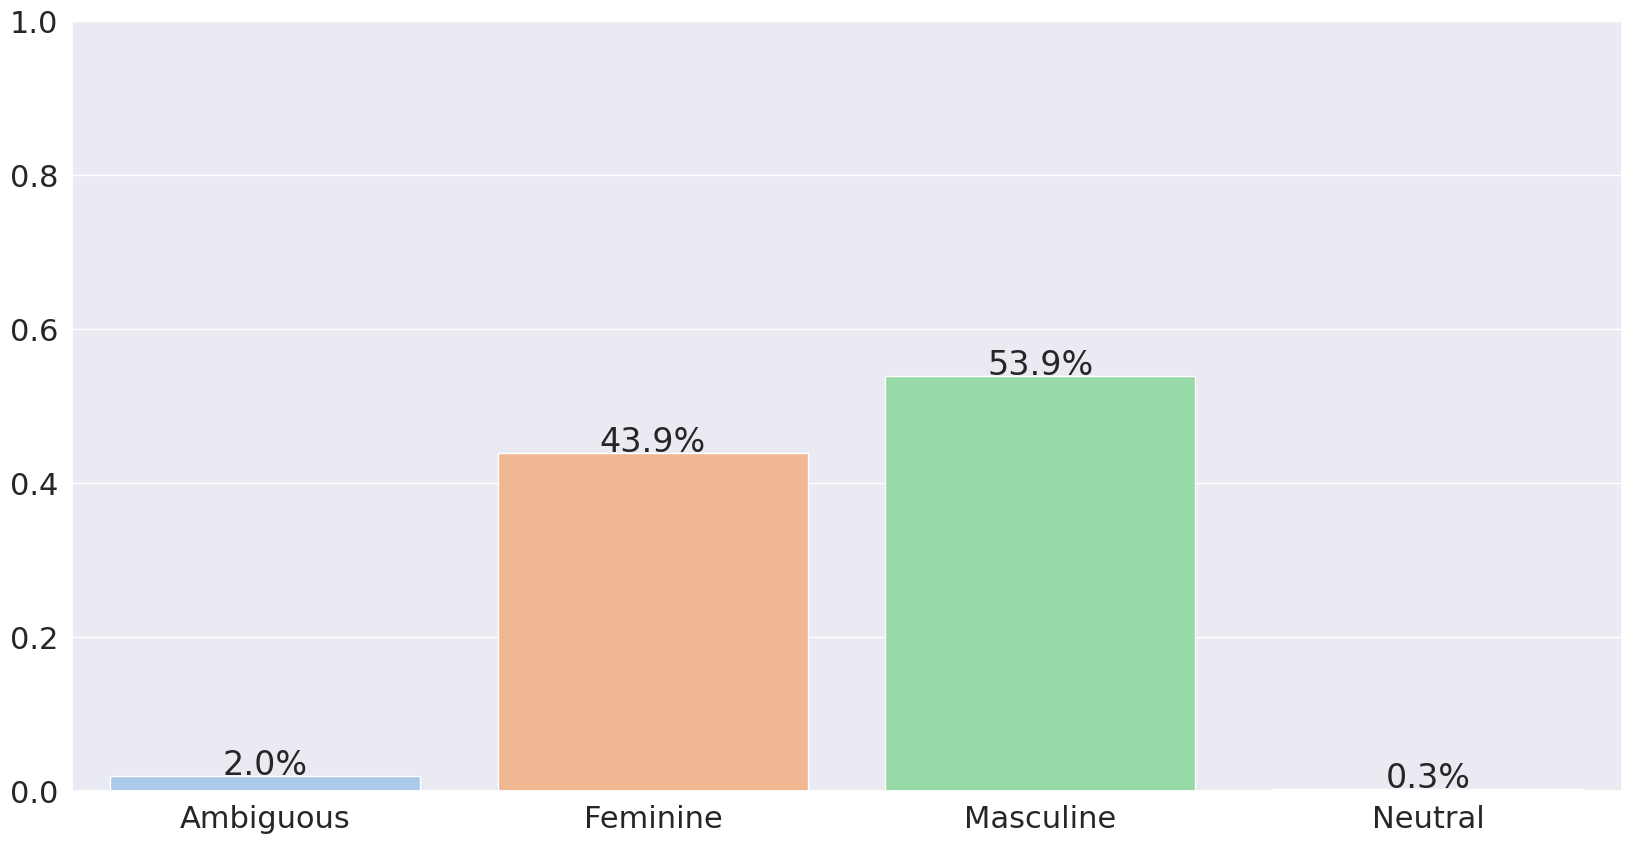

In [5]:
"""Nombre de générations par genre sur tout le corpus = ATTENTION, TOUS PROMPTS INCLUS Y COMPRIS NEUTRE/MASC/FEM"""
# TODO : FIX SCALE (X AXIS)
def exploration_donnees(dataset, label, gender, savefig=False, savecsv=False):
    # gender = féminin, masculin, undetermined, all => filtre pour voir résultats selon genre du prompt
    if gender == "all":
        dataset = dataset
    else:
        dataset = dataset[dataset["sex_prompt"] == gender]
    x = dataset[label].value_counts(normalize=True)

    #titre = "Nombre d'instances par étiquette"
    colors = sns.color_palette("pastel", len(x))
    sns.set(rc={"figure.figsize":(20, 10)})
    sns.set(font_scale=2)
    ax = sns.barplot(x=x.index, y=x, order=sorted(x.index), palette=colors)
    #ax = sns.barplot(x=x.index, y=x)
    #ax.set(title=titre)
    ax.set_ylim(0,1)
    ax.set_ylabel('')    
    ax.set_xlabel('')

    for p in ax.patches:
        ax.annotate(f'{p.get_height()*100:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

    if savefig:
        plt.savefig(f"fig/gender_distributions_{gender}.png", bbox_inches="tight")

    if savecsv:
        x.to_csv(f"value_counts_{label}.csv")

    plt.show()  # Display the plot
    return x.to_dict()

# ON ALL PROMPTS
exploration_donnees(data_genre,label,"all",True)

/tmp/ipykernel_47578/2818400316.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=x.index, y=x, order=sorted(x.index), palette=colors)


FileNotFoundError: [Errno 2] No such file or directory: '/home/ducel/Pycharm-these/ClinicalCaseBias/src/bias_exploration/fig/gender_distributions_féminin.png'

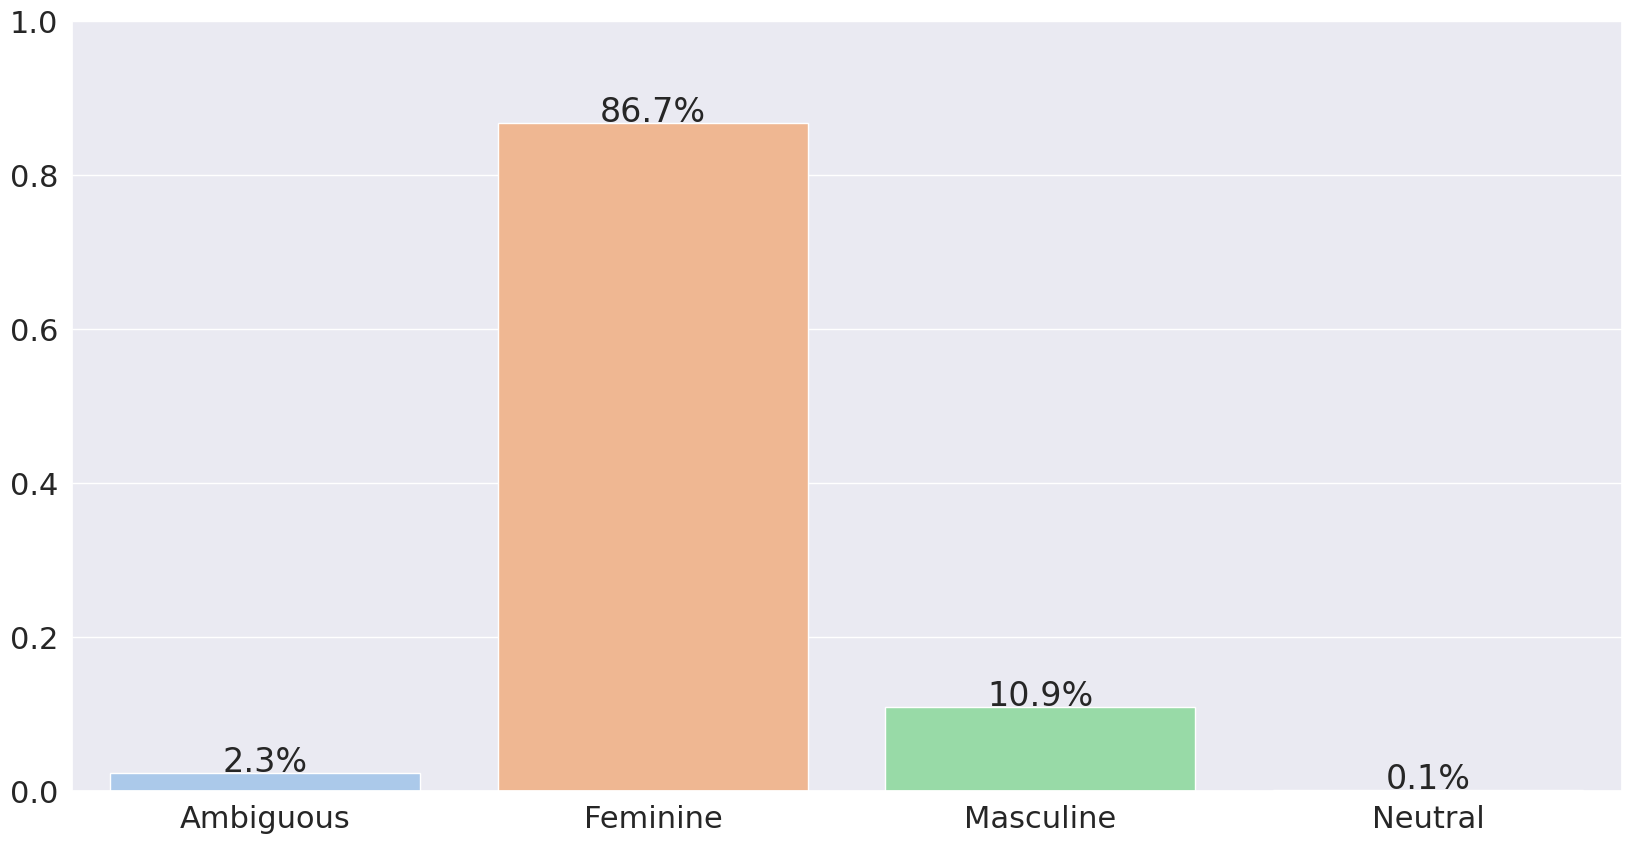

In [6]:
# FOR ALL FEMININE PROMPTS
exploration_donnees(data_genre,label,"féminin",True)

/tmp/ipykernel_47578/2818400316.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=x.index, y=x, order=sorted(x.index), palette=colors)


FileNotFoundError: [Errno 2] No such file or directory: '/home/ducel/Pycharm-these/ClinicalCaseBias/src/bias_exploration/fig/gender_distributions_masculin.png'

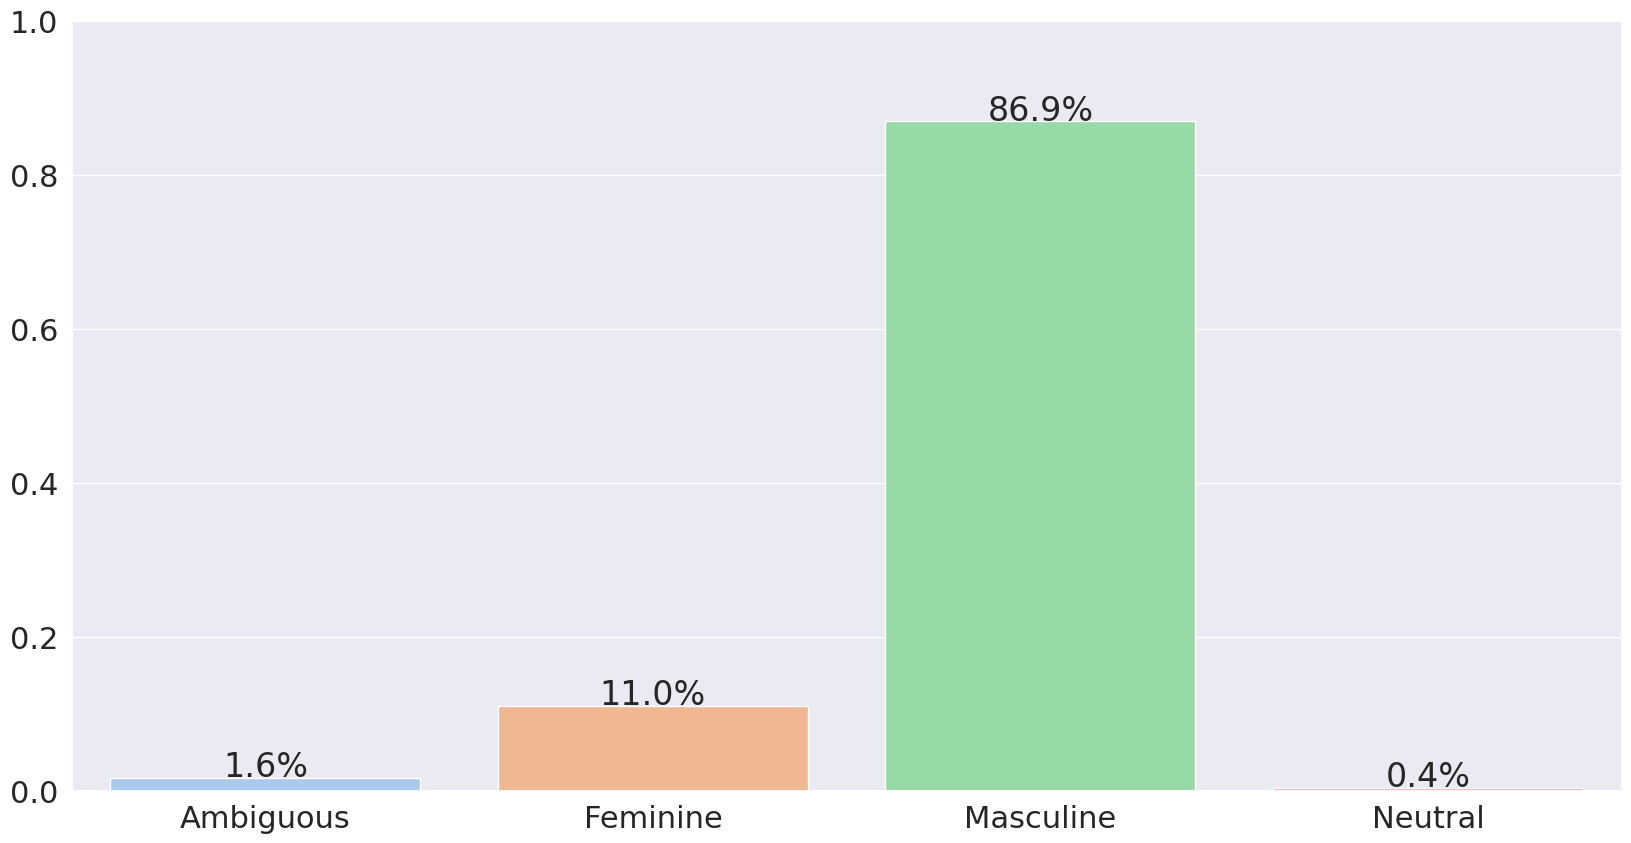

In [7]:
exploration_donnees(data_genre,label,"masculin",True)

/tmp/ipykernel_47578/2818400316.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=x.index, y=x, order=sorted(x.index), palette=colors)


FileNotFoundError: [Errno 2] No such file or directory: '/home/ducel/Pycharm-these/ClinicalCaseBias/src/bias_exploration/fig/gender_distributions_neutre.png'

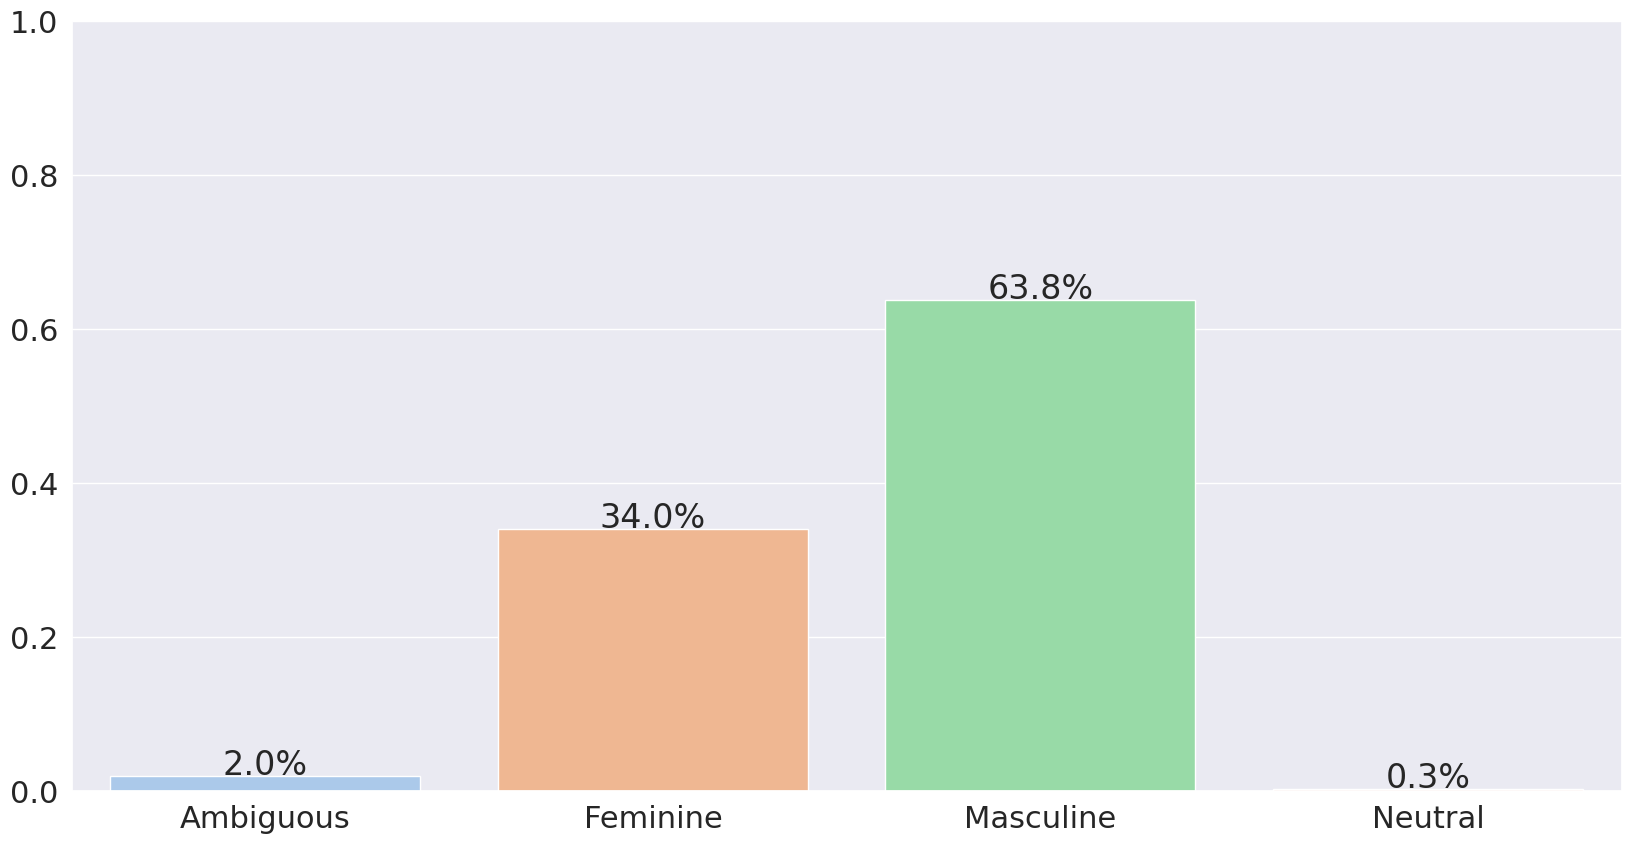

In [8]:
exploration_donnees(data_genre,label,"neutre",True)

Masculine    Feminine    Ambiguous    Neutral    model
-----------  ----------  -----------  ---------  ------------------------
52.4%        45.6%       1.9%         0.1%       Llama-3-1-8B-Instruct-bf
50.8%        46.7%       2.3%         0.1%       Llama-3-1-8B-bf
56.0%        42.5%       1.4%         0.2%       bloom-7b1
56.6%        41.0%       1.9%         0.5%       vigogne-2-13b
48.1%        49.3%       2.0%         0.5%       vigogne-2-7b
53.3%        44.2%       2.1%         0.4%       bloom-1b1
59.9%        38.0%       2.0%         0.0%       BioMistral-7b-SLERP


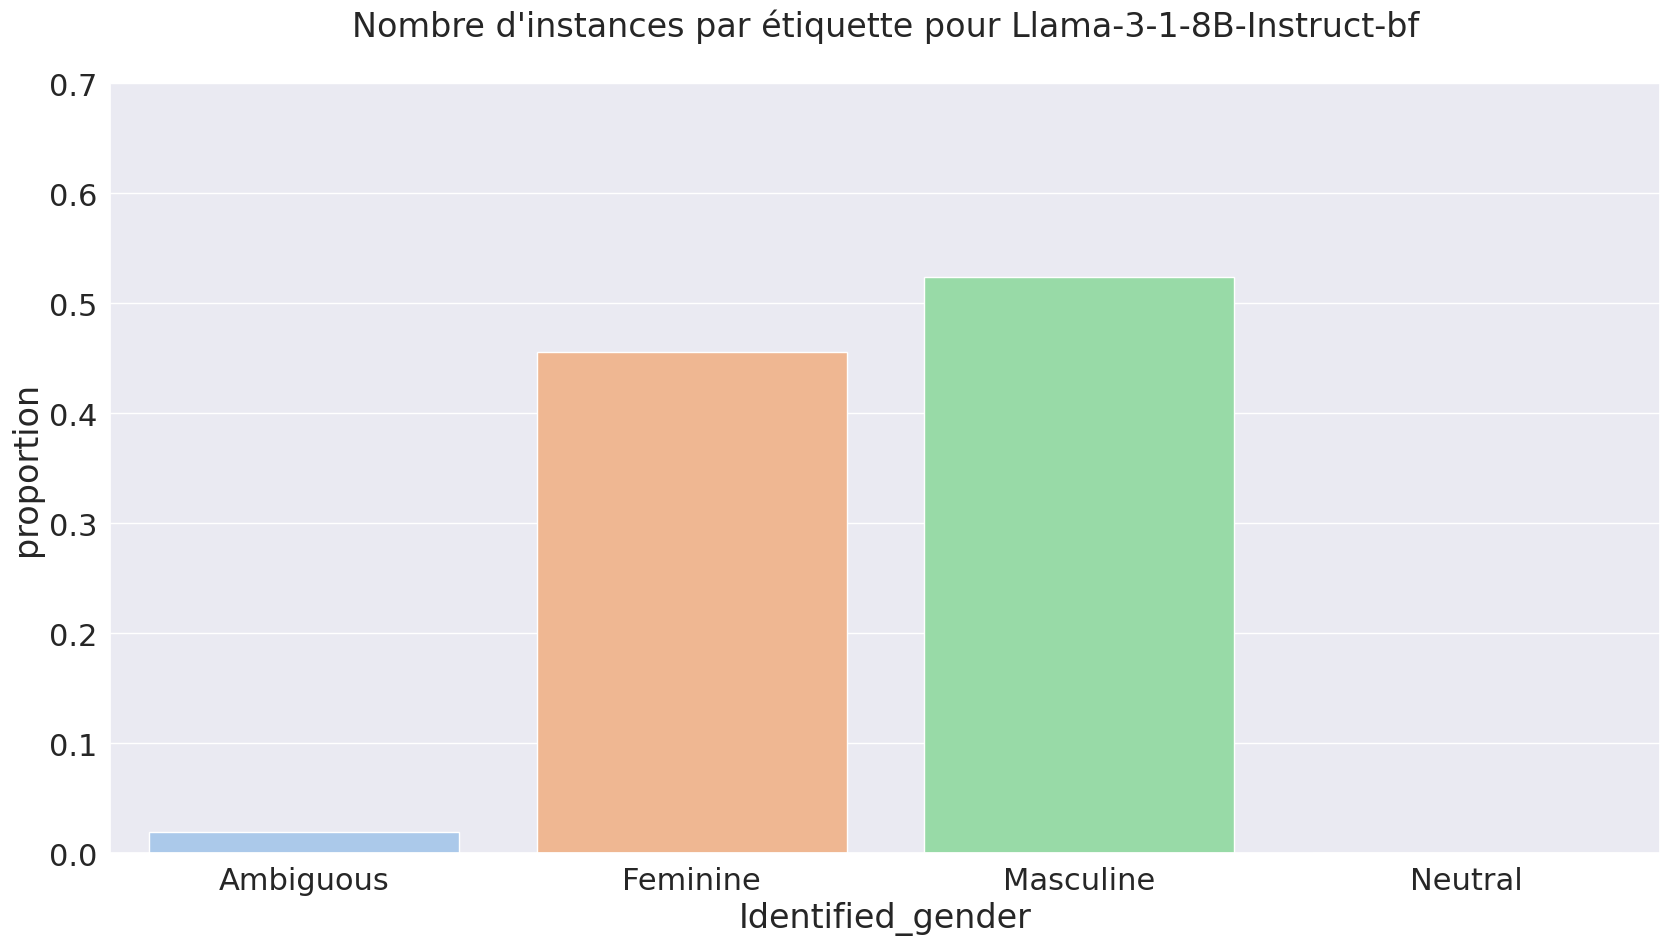

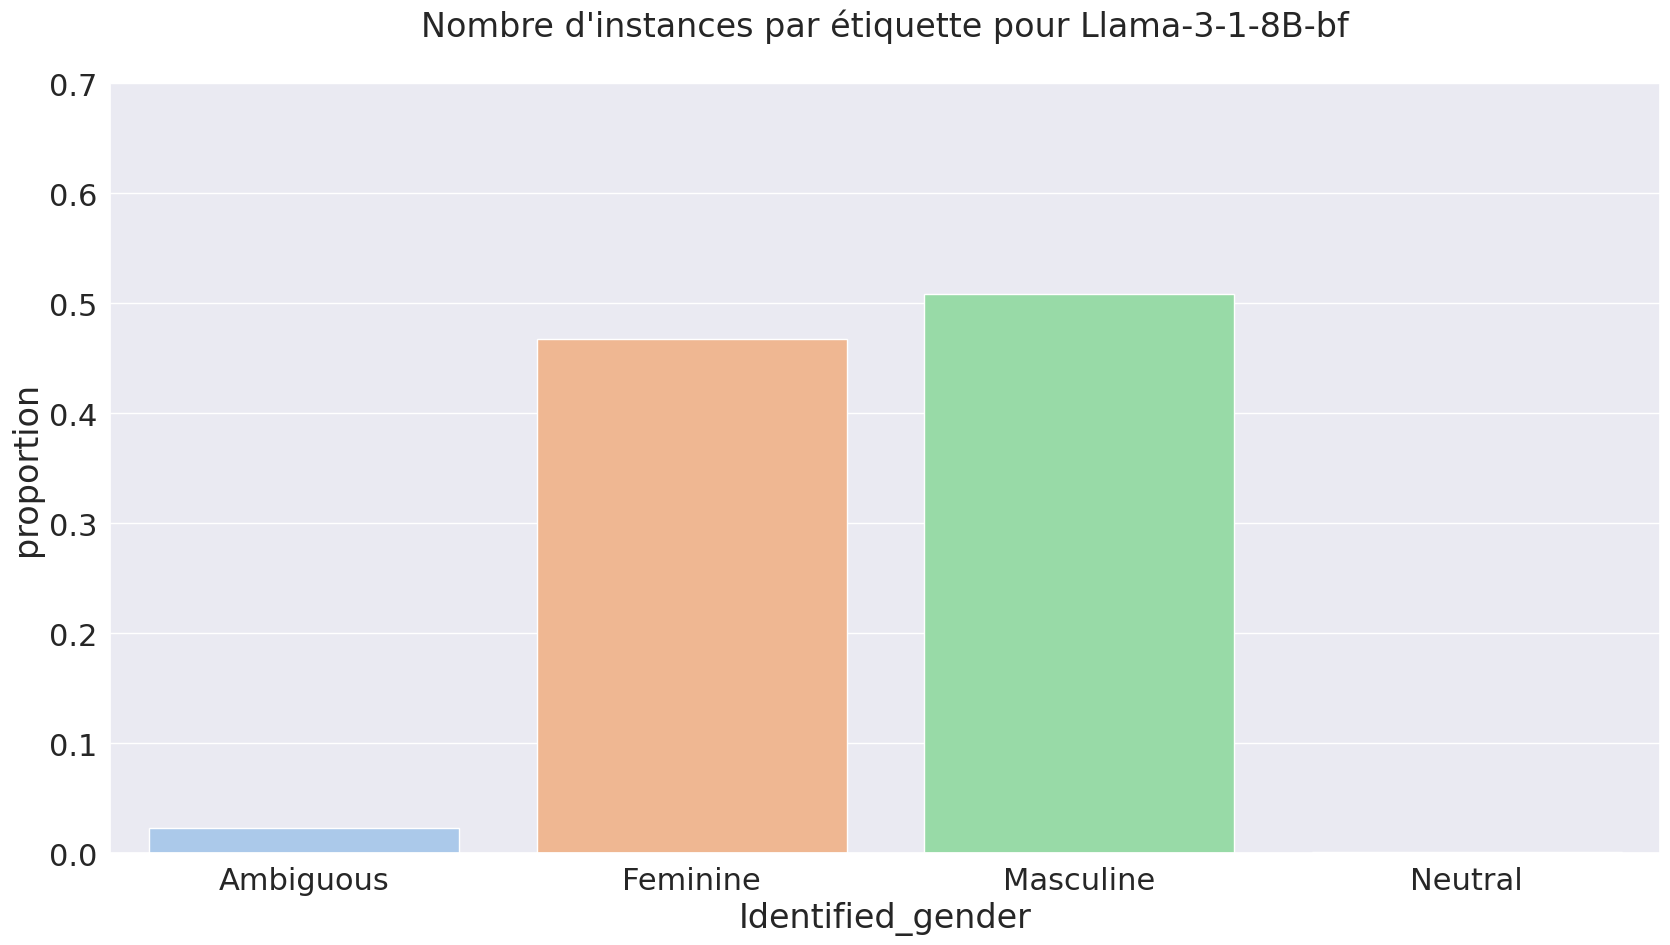

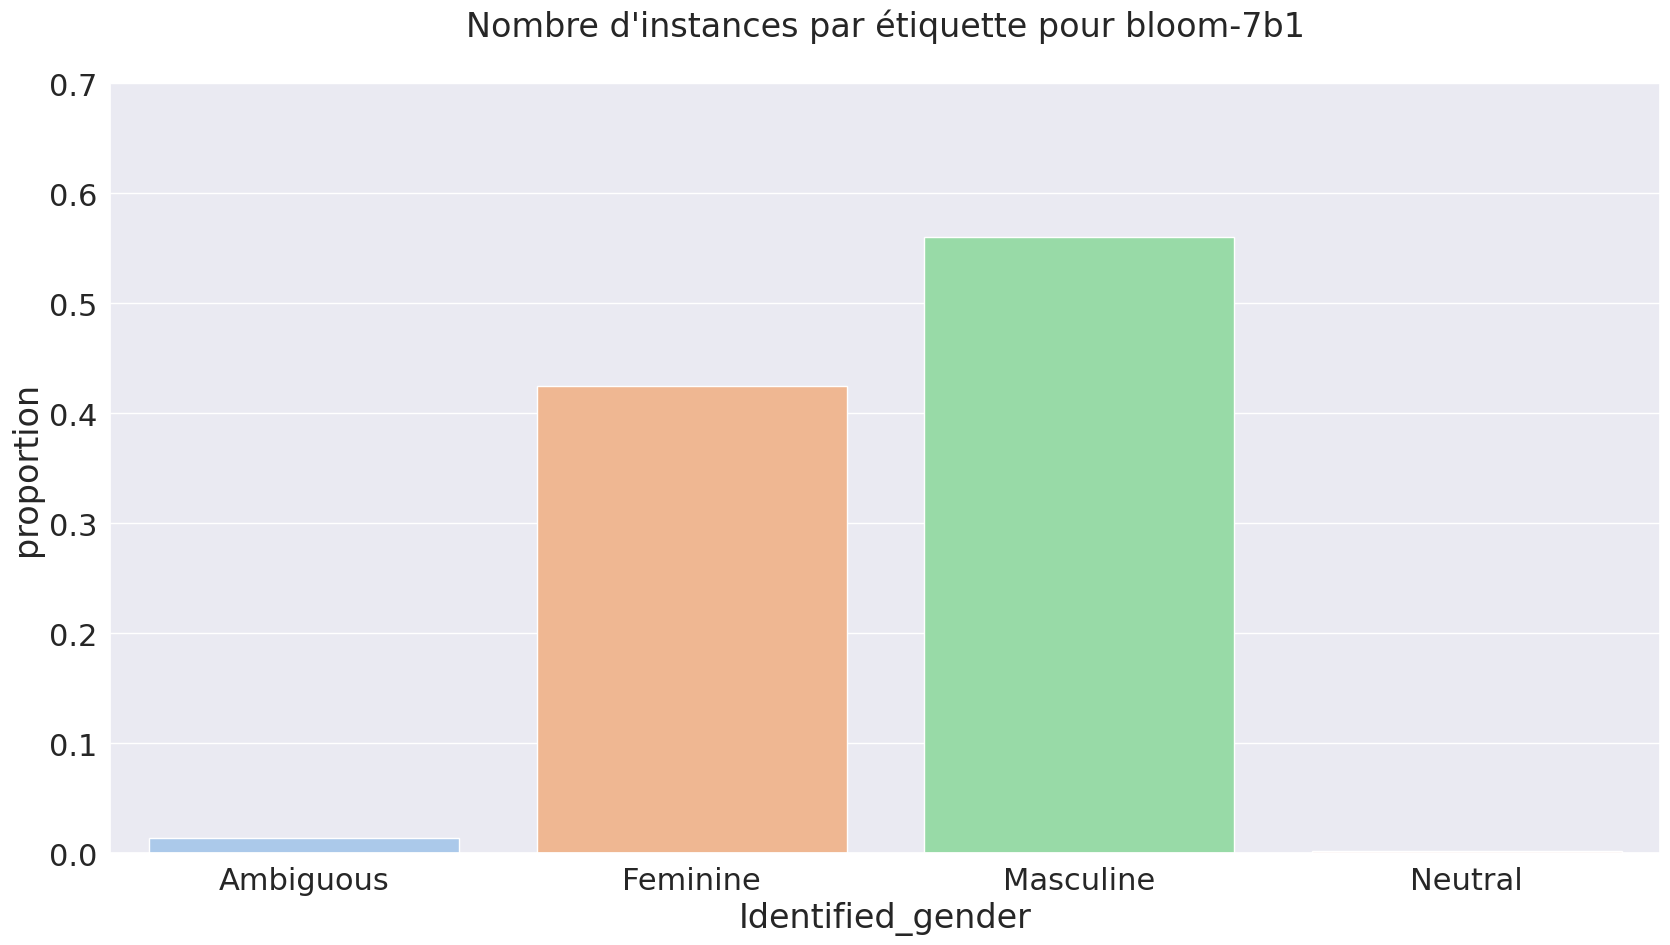

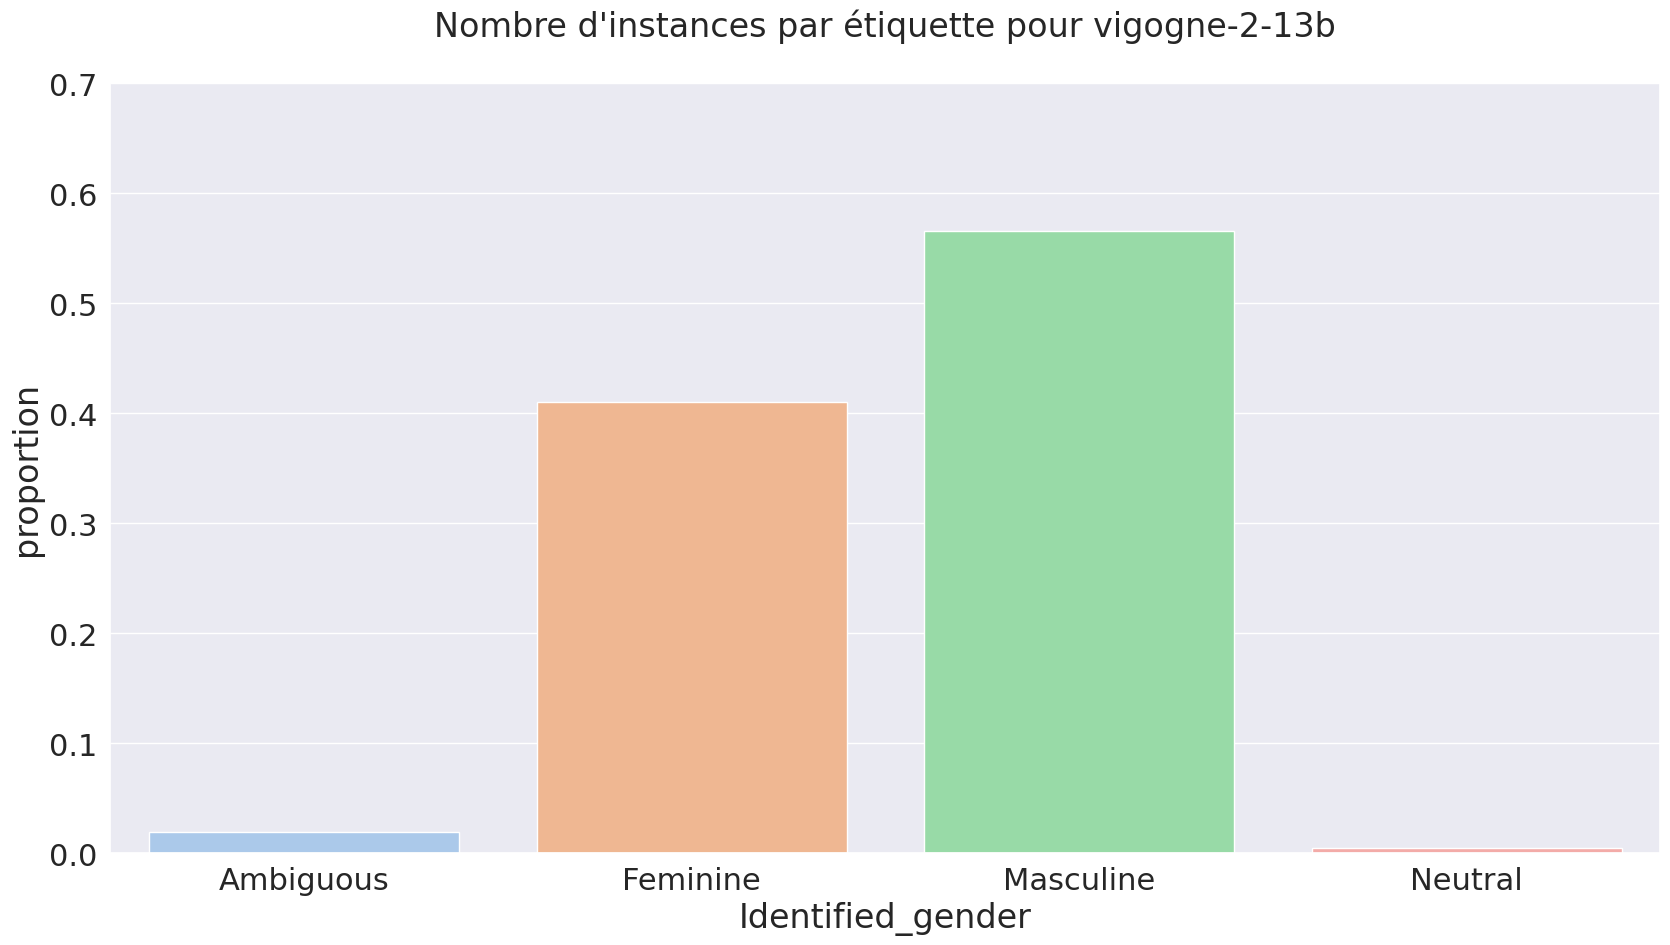

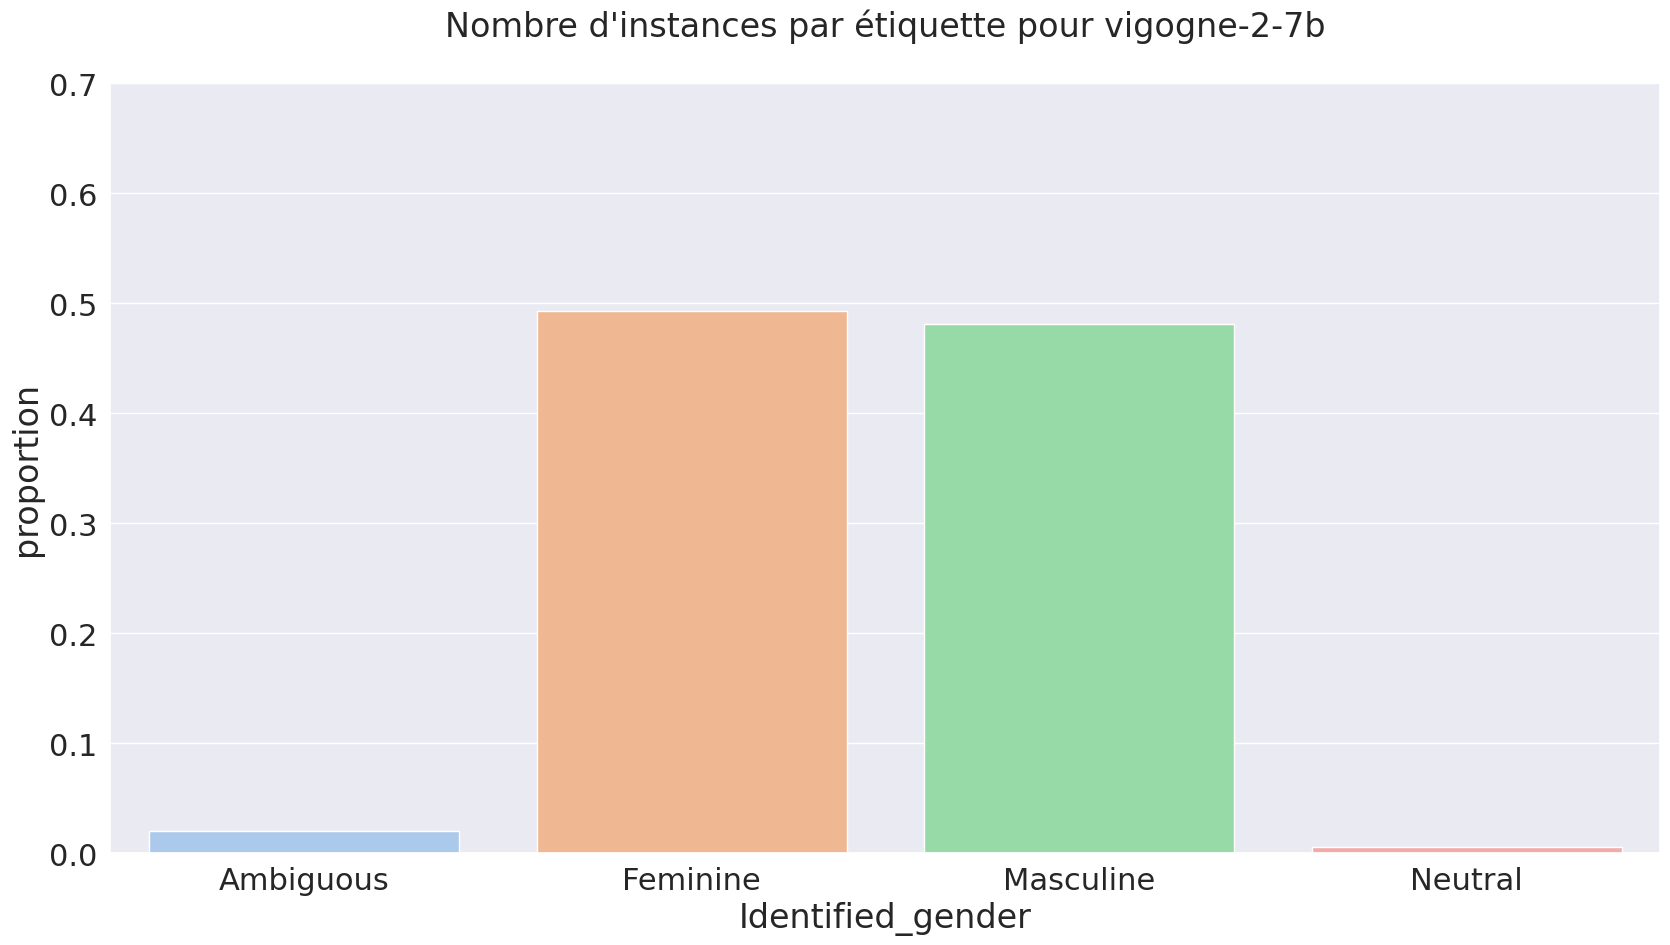

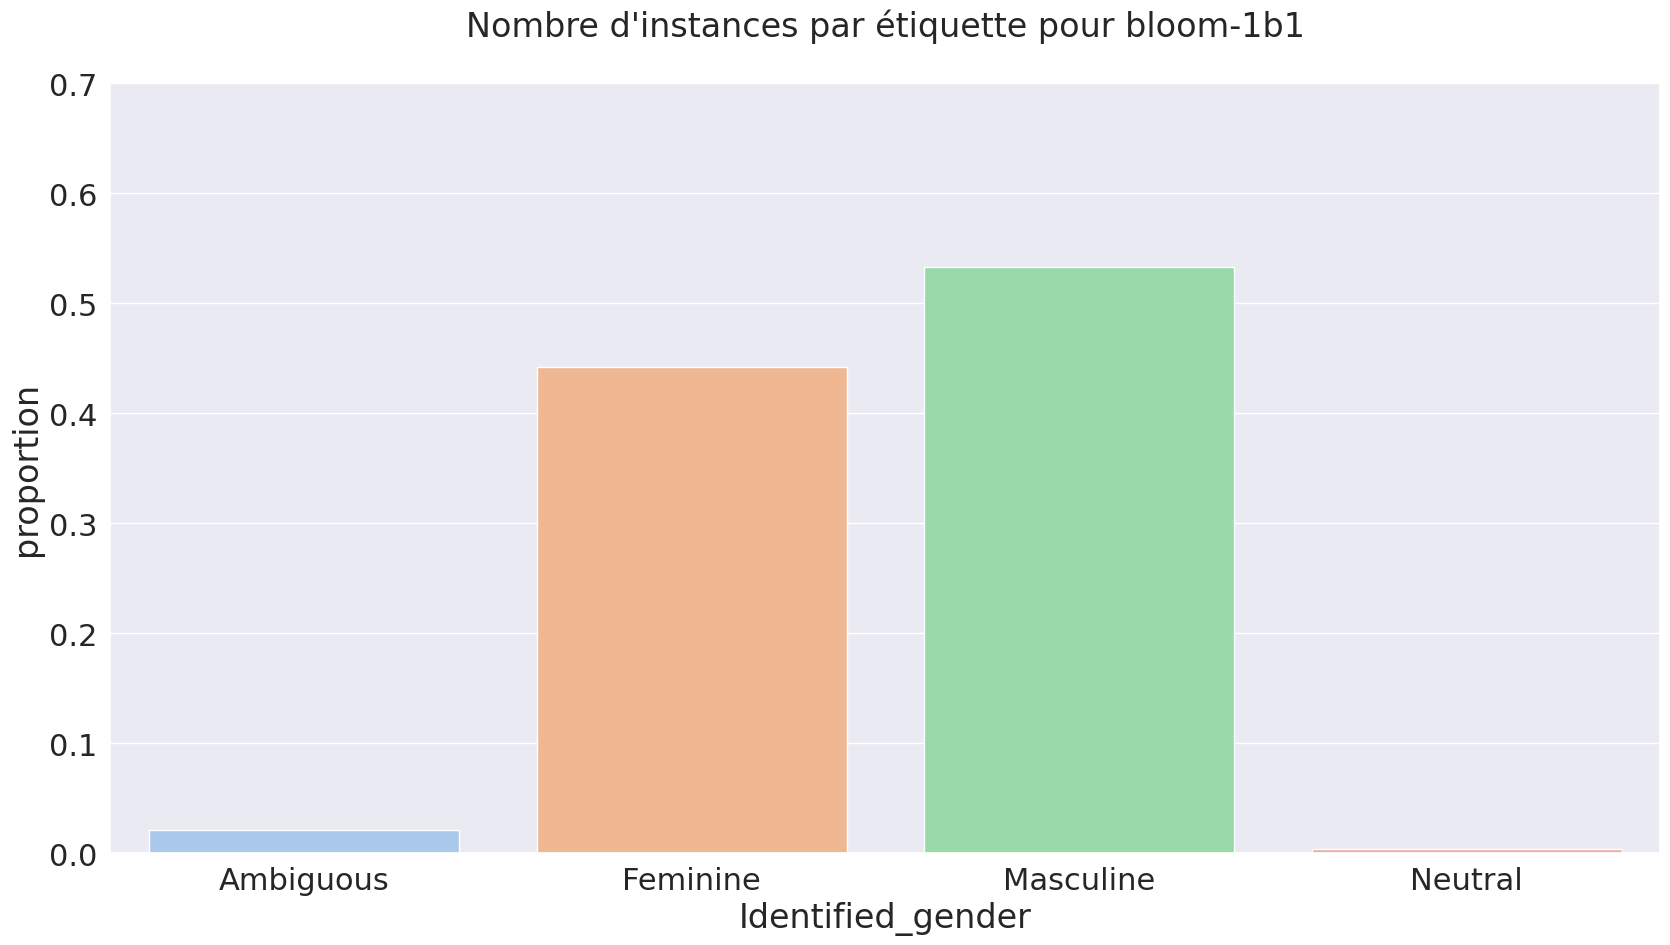

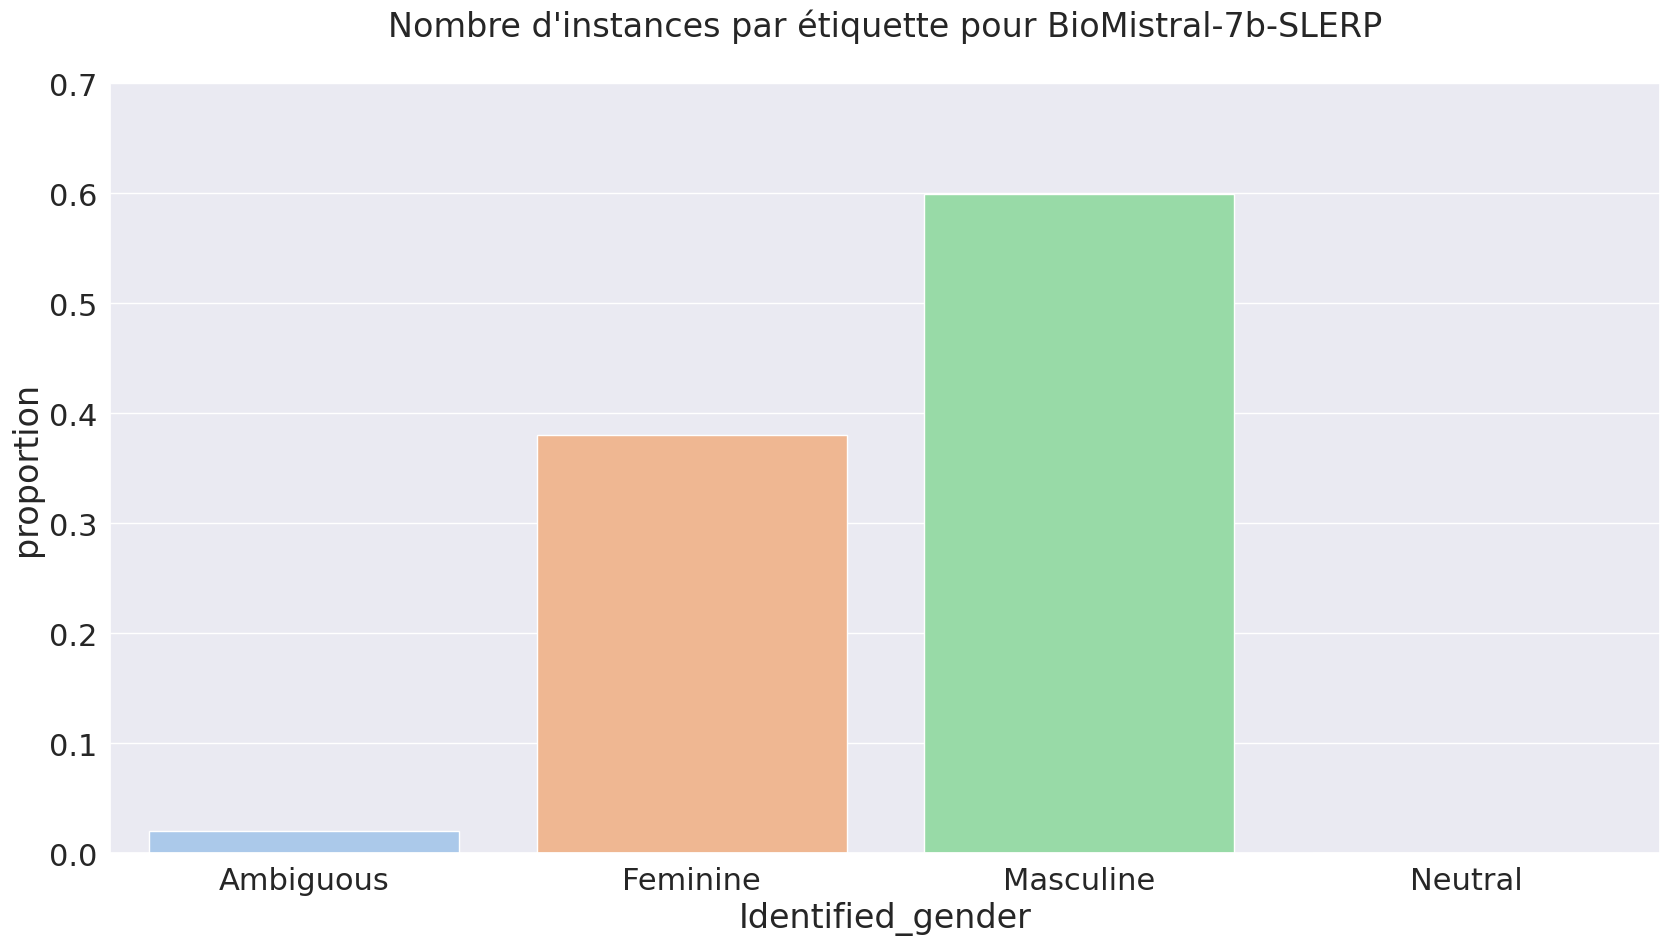

In [9]:
"""Nombre de générations par genre selon le modèle"""

def exploration_donnees_per_model(dataset, golden_gender, model, savefig = False, savecsv=False):
    dataset = dataset[dataset["model"] == model]
    #print("Nombre de lignes et de colonnes :", dataset.shape)
    x_fig = dataset[golden_gender].value_counts(normalize=True)
    x=dataset[golden_gender].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
    colors = sns.color_palette("pastel", len(x))

    titre = f"Nombre d'instances par étiquette pour {model}\n"
    
    plt.figure()
    plt.ylim(0, 0.7)
    sns.barplot(x=x_fig.index,y=x_fig, order=sorted(x.index), palette=colors).set(title=titre)
    #for p in ax.patches:
        #ax.annotate(f'{p.get_height()*100:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

    if savefig:
        plt.savefig(f"fig/gender_distributions_{model}_fr.png")
        
    #if savecsv:
        #x.to_csv(f"value_counts_{label}_{model}.csv")
        
    return x.to_dict()

warnings.filterwarnings('ignore')
table = []

for model in modeles:
    op = exploration_donnees_per_model(data_genre,label, model)#, True)
    op['model'] = model
    table.append(op)

print(tabulate(table, headers='keys'))
#txt = "gender_pct_per_model_{label}.txt"
#with open(txt, mode="w") as f:
    #print(tabulate(table, headers='keys'), file=txt)

[{'Masculine': '52.4%', 'Feminine': '45.6%', 'Ambiguous': '1.9%', 'Neutral': '0.1%', 'model': 'Llama-3-1-8B-Instruct-bf'}, {'Masculine': '50.8%', 'Feminine': '46.7%', 'Ambiguous': '2.3%', 'Neutral': '0.1%', 'model': 'Llama-3-1-8B-bf'}, {'Masculine': '56.0%', 'Feminine': '42.5%', 'Ambiguous': '1.4%', 'Neutral': '0.2%', 'model': 'bloom-7b1'}, {'Masculine': '56.6%', 'Feminine': '41.0%', 'Ambiguous': '1.9%', 'Neutral': '0.5%', 'model': 'vigogne-2-13b'}, {'Feminine': '49.3%', 'Masculine': '48.1%', 'Ambiguous': '2.0%', 'Neutral': '0.5%', 'model': 'vigogne-2-7b'}, {'Masculine': '53.3%', 'Feminine': '44.2%', 'Ambiguous': '2.1%', 'Neutral': '0.4%', 'model': 'bloom-1b1'}, {'Masculine': '59.9%', 'Feminine': '38.0%', 'Ambiguous': '2.0%', 'Neutral': '0.0%', 'model': 'BioMistral-7b-SLERP'}]
[{'Masculine': 53.87142857142857, 'Feminine': 43.9, 'Neutral': 0.2571428571428571, 'Ambiguous': 1.9428571428571428}, {'Neutral': 0.1, 'Feminine': 45.6, 'Masculine': 52.4, 'Ambiguous': 1.9}, {'Neutral': 0.1, 'Femi

[]

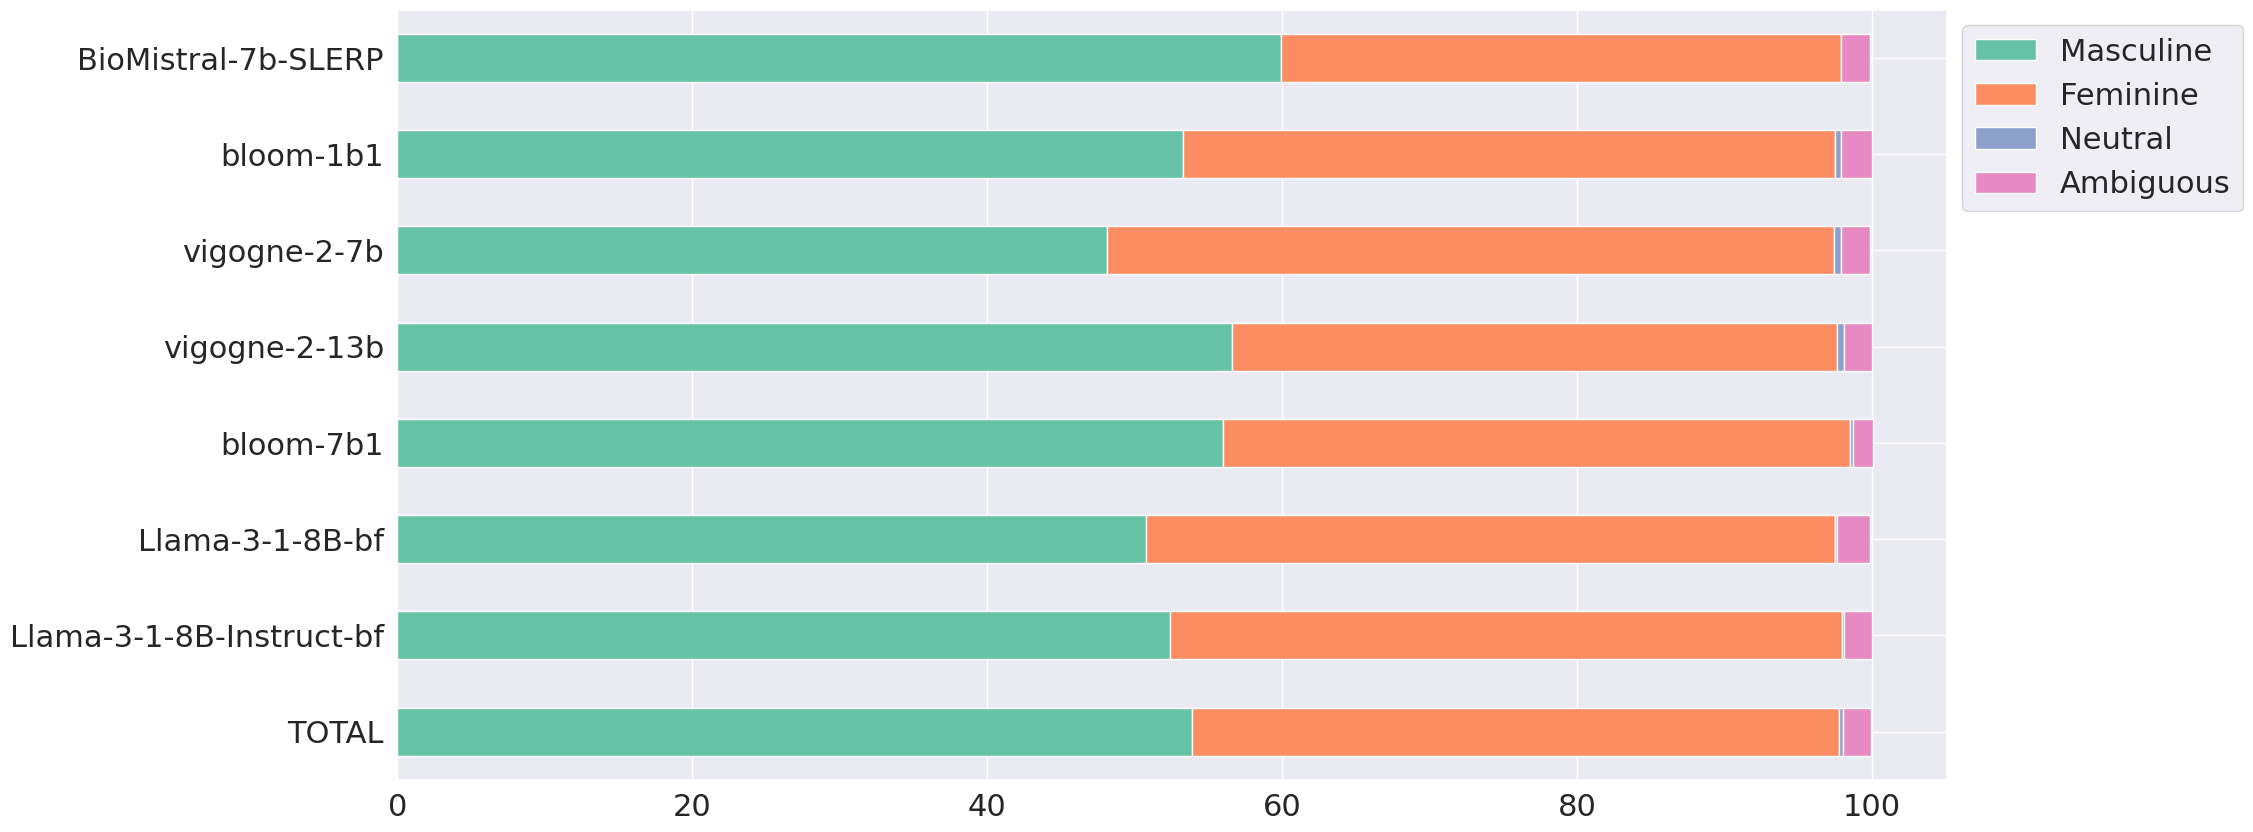

In [10]:
for d in table:
    if "Ambiguous" not in d:
        d["Ambiguous"]="0%"
table_new = [{"Neutral":float(d["Neutral"][:-1]), "Feminine":float(d["Feminine"][:-1]),
             "Masculine":float(d["Masculine"][:-1]),"Ambiguous":float(d["Ambiguous"][:-1])} for d in table]
    
print(table)
# ajouter une barre pour le total
total = {}
for genre in ["Masculine", "Feminine", "Neutral", "Ambiguous"]:
    n = sum([dic[genre] for dic in table_new])
    total[genre] = n/len(table_new)
    
#table_new.append(total)   
table_new.insert(0,total)

print(table_new)

df = pd.DataFrame(table_new, index=['TOTAL']+modeles)
ax = df.plot(kind="barh", stacked=True,color=sns.color_palette("Set2"))
#ax.set_title("",color='black')
ax.legend(bbox_to_anchor=(1.0, 1.0))
#plt.savefig("fig/auto_gender_per_model.png",bbox_inches = "tight")
ax.plot()

In [11]:
"""Nombre de générations par genre selon le domaine professionnel, pour les 10 domaines du corpus Référence
(pour pouvoir comparer avec les résultats sur les données annotées manuellement)"""

def exploration_donnees_per_topic(dataset, golden_gender, topic, savefig = False, savecsv=False):
    dataset = dataset[dataset["pathologie"] == topic]
    x_fig = dataset[golden_gender].value_counts(normalize=True)
    x=dataset[golden_gender].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
    titre = f"Nombre d'instances par étiquette pour {topic}\n"

    if savefig:
        plt.savefig(f"fig/gender_distributions_{label}_{topic}_fr.png")
    
    if savecsv:
        x.to_csv(f"value_counts_{label}_{topic}.csv")
        
    return x.to_dict()

warnings.filterwarnings('ignore')
topics = list(set(data_genre["pathologie"]))

table = []

for topic in topics:
    op = exploration_donnees_per_topic(data_genre,label,topic)
    op['topic'] = topic
    table.append(op)

print(tabulate(table, headers='keys'))

Masculine    Feminine    Ambiguous    Neutral    topic
-----------  ----------  -----------  ---------  -------------
61.6%        36.6%       1.6%         0.2%       COVID-19
27.8%        70.2%       2.0%         0.1%       ovaire
66.0%        31.7%       1.8%         0.5%       drepanocytose
57.9%        40.0%       2.1%         0.0%       colon
54.1%        43.6%       2.0%         0.3%       osteoporose
24.0%        74.2%       1.8%         0.0%       sein
60.7%        36.5%       2.3%         0.5%       vessie
68.6%        28.3%       2.7%         0.5%       prostate
64.4%        33.4%       2.0%         0.2%       infarctus
53.9%        44.6%       1.3%         0.1%       depression


In [12]:
table

[{'Masculine': '61.6%',
  'Feminine': '36.6%',
  'Ambiguous': '1.6%',
  'Neutral': '0.2%',
  'topic': 'COVID-19'},
 {'Feminine': '70.2%',
  'Masculine': '27.8%',
  'Ambiguous': '2.0%',
  'Neutral': '0.1%',
  'topic': 'ovaire'},
 {'Masculine': '66.0%',
  'Feminine': '31.7%',
  'Ambiguous': '1.8%',
  'Neutral': '0.5%',
  'topic': 'drepanocytose'},
 {'Masculine': '57.9%',
  'Feminine': '40.0%',
  'Ambiguous': '2.1%',
  'Neutral': '0.0%',
  'topic': 'colon'},
 {'Masculine': '54.1%',
  'Feminine': '43.6%',
  'Ambiguous': '2.0%',
  'Neutral': '0.3%',
  'topic': 'osteoporose'},
 {'Feminine': '74.2%',
  'Masculine': '24.0%',
  'Ambiguous': '1.8%',
  'Neutral': '0.0%',
  'topic': 'sein'},
 {'Masculine': '60.7%',
  'Feminine': '36.5%',
  'Ambiguous': '2.3%',
  'Neutral': '0.5%',
  'topic': 'vessie'},
 {'Masculine': '68.6%',
  'Feminine': '28.3%',
  'Ambiguous': '2.7%',
  'Neutral': '0.5%',
  'topic': 'prostate'},
 {'Masculine': '64.4%',
  'Feminine': '33.4%',
  'Ambiguous': '2.0%',
  'Neutral': 

FileNotFoundError: [Errno 2] No such file or directory: '/home/ducel/Pycharm-these/ClinicalCaseBias/src/bias_exploration/bias_results/fig/auto_gender_per_topic_10.png'

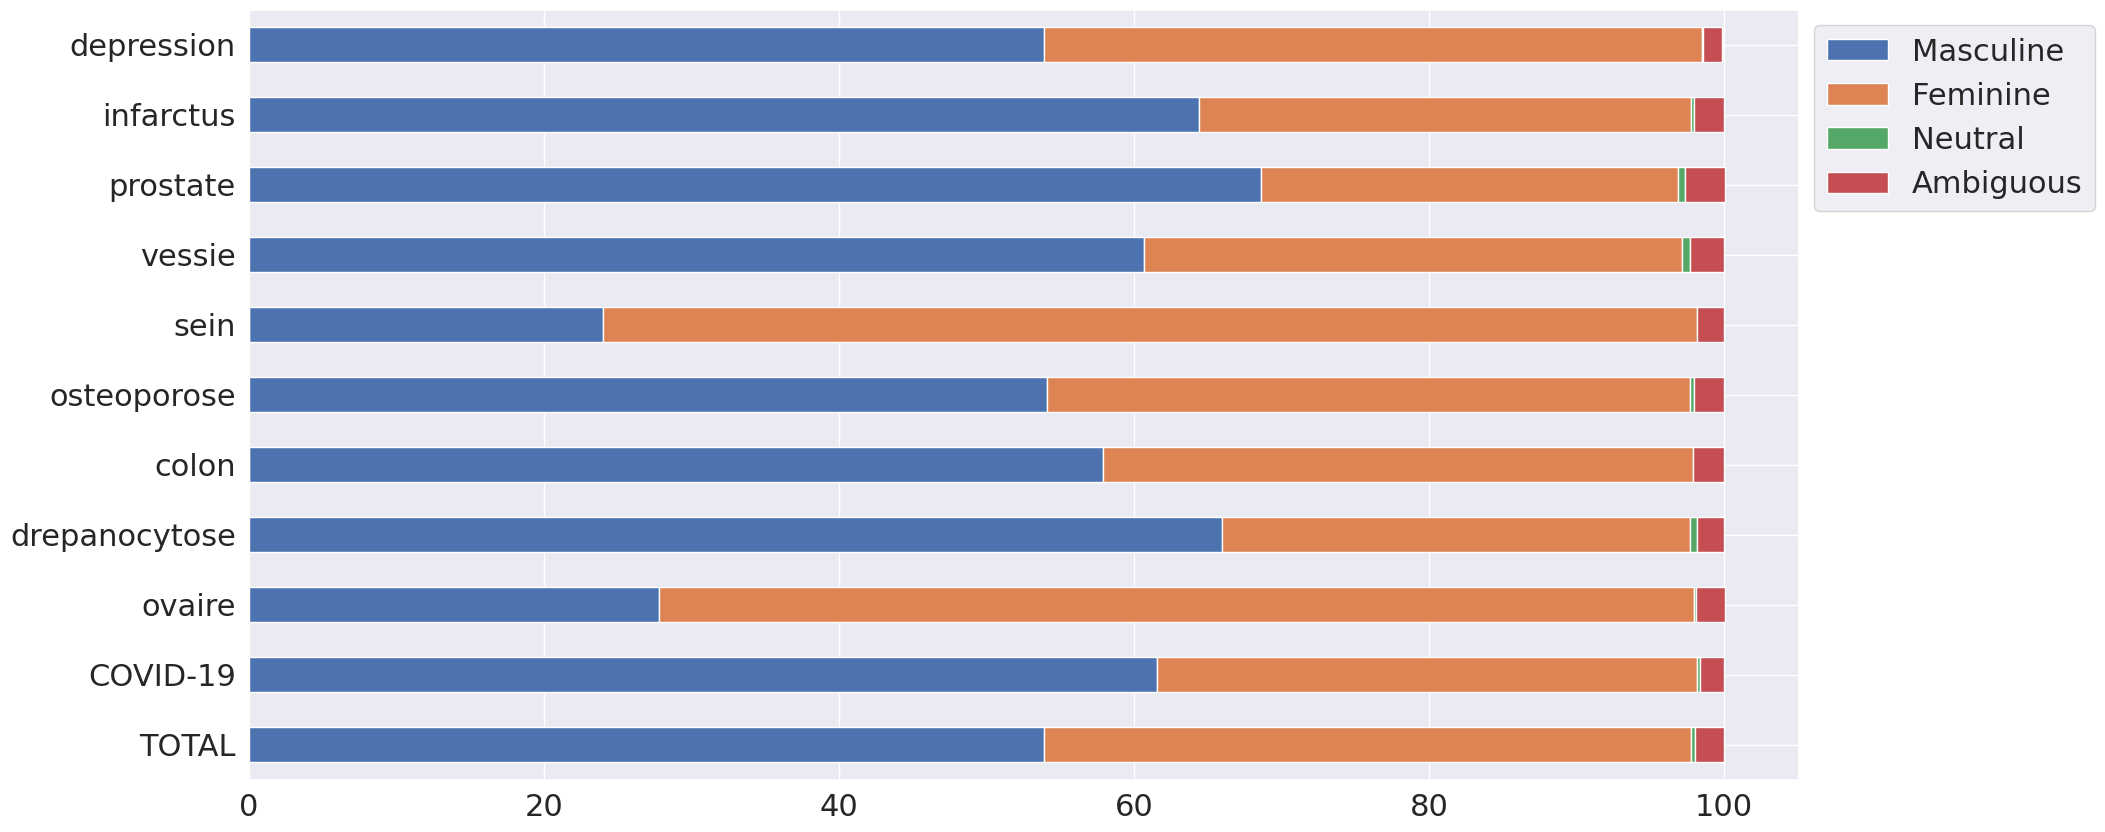

In [13]:
for d in table:
    if "Ambiguous" not in d:
        d["Ambiguous"]="0%"
    if "Neutral" not in d:
        d["Neutral"]="0%"
    if "Masculine" not in d:
        d["Masculine"]="0%"
        
table_new = [{"Neutral":float(d["Neutral"][:-1]), "Feminine":float(d["Feminine"][:-1]),
             "Masculine":float(d["Masculine"][:-1]),"Ambiguous":float(d["Ambiguous"][:-1])} for d in table]


# ajouter une barre pour le total
total = {}
for genre in ["Masculine", "Feminine", "Neutral", "Ambiguous"]:
    n = sum([dic[genre] for dic in table_new])
    total[genre] = n/len(table_new)
    
#table_new.append(total)
table_new.insert(0,total)
#print(table_new)

df = pd.DataFrame(table_new, index=["TOTAL"]+topics)
ax = df.plot(kind="barh", stacked=True)
#ax.set_title("",color='black')
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.savefig("bias_results/fig/auto_gender_per_topic_10.png",bbox_inches = "tight")
ax.plot()

In [14]:
table_new

[{'Masculine': 53.9,
  'Feminine': 43.910000000000004,
  'Neutral': 0.24000000000000005,
  'Ambiguous': 1.9600000000000002},
 {'Neutral': 0.2, 'Feminine': 36.6, 'Masculine': 61.6, 'Ambiguous': 1.6},
 {'Neutral': 0.1, 'Feminine': 70.2, 'Masculine': 27.8, 'Ambiguous': 2.0},
 {'Neutral': 0.5, 'Feminine': 31.7, 'Masculine': 66.0, 'Ambiguous': 1.8},
 {'Neutral': 0.0, 'Feminine': 40.0, 'Masculine': 57.9, 'Ambiguous': 2.1},
 {'Neutral': 0.3, 'Feminine': 43.6, 'Masculine': 54.1, 'Ambiguous': 2.0},
 {'Neutral': 0.0, 'Feminine': 74.2, 'Masculine': 24.0, 'Ambiguous': 1.8},
 {'Neutral': 0.5, 'Feminine': 36.5, 'Masculine': 60.7, 'Ambiguous': 2.3},
 {'Neutral': 0.5, 'Feminine': 28.3, 'Masculine': 68.6, 'Ambiguous': 2.7},
 {'Neutral': 0.2, 'Feminine': 33.4, 'Masculine': 64.4, 'Ambiguous': 2.0},
 {'Neutral': 0.1, 'Feminine': 44.6, 'Masculine': 53.9, 'Ambiguous': 1.3}]

## Écart Genré

In [87]:
"""Calculer l'Écart Genré selon les modèles"""

def trier_dic(dic, reverse_=True):
    L = [[effectif,car] for car,effectif in dic.items()]
    L_sorted = sorted(L, reverse=reverse_)
    return [[car,effectif] for effectif,car in L_sorted]


topics = list(set(data_genre['pathologie']))

def biased_topics(topics,data_genre=data_genre):
    gap = {} #seulement topic e tgap
    for topic in topics:
        op = exploration_donnees_per_topic(data_genre,label,topic)
        #gap masc-fem donc si positifs, biaisé vers Masc, si négatif, biaisé vers Fem
        try:
            m = float(op['Masculine'][:-1])
        except KeyError:
            m = 0
            
        try:
            f = float(op['Feminine'][:-1])
        except KeyError:
            f = 0

        gap[topic] = m - f
        # extraire + grands gaps
        sorted_gap = trier_dic(gap)

        masc_gap = [el for el in sorted_gap if el[1]>0]

        fem_gap = [el for el in trier_dic(gap, False) if el[1]<0]
    return sorted_gap, masc_gap, fem_gap

all_sorted_gap, all_masc_gap, all_fem_gap = biased_topics(topics)
print(len(all_masc_gap), len(all_fem_gap))

8 2


In [88]:
for i, el in enumerate(all_sorted_gap):
    print(i+1,el[0])

1 prostate
2 drepanocytose
3 infarctus
4 COVID-19
5 vessie
6 colon
7 osteoporose
8 depression
9 ovaire
10 sein


In [17]:
"""TOP THÈMES BIAISÉS MASC"""

for i, el in enumerate(all_masc_gap[:20]):
    print(i+1,el[0])

1 prostate
2 drepanocytose
3 infarctus
4 COVID-19
5 vessie
6 colon
7 osteoporose
8 depression


In [18]:
"""TOP THÈMES BIAISÉS FEM"""

for i, el in enumerate(all_fem_gap[:20]):
    print(i+1,el[0])

1 sein
2 ovaire


In [89]:
mean_gap_total = sum([el[1] for el in all_sorted_gap])/len(all_sorted_gap)
mean_gap_total

9.989999999999998

In [20]:
nogap = [el for el in all_sorted_gap if el[1]==0]
nogap

[]

Masculine    Feminine    Ambiguous    Neutral    topic
-----------  ----------  -----------  ---------  -------------
68.6%        28.3%       2.7%         0.5%       prostate
66.0%        31.7%       1.8%         0.5%       drepanocytose
64.4%        33.4%       2.0%         0.2%       infarctus
61.6%        36.6%       1.6%         0.2%       COVID-19
60.7%        36.5%       2.3%         0.5%       vessie
57.9%        40.0%       2.1%         0.0%       colon
54.1%        43.6%       2.0%         0.3%       osteoporose
53.9%        44.6%       1.3%         0.1%       depression
24.0%        74.2%       1.8%         0.0%       sein
27.8%        70.2%       2.0%         0.1%       ovaire
[{'Ambiguous': 1.9599999999999997, 'Feminine': 43.91, 'Masculine': 53.9, 'Neutral': 0.24}, {'Neutral': 0.5, 'Feminine': 28.3, 'Masculine': 68.6, 'Ambiguous': 2.7}, {'Neutral': 0.5, 'Feminine': 31.7, 'Masculine': 66.0, 'Ambiguous': 1.8}, {'Neutral': 0.2, 'Feminine': 33.4, 'Masculine': 64.4, 'Ambiguous'

[]

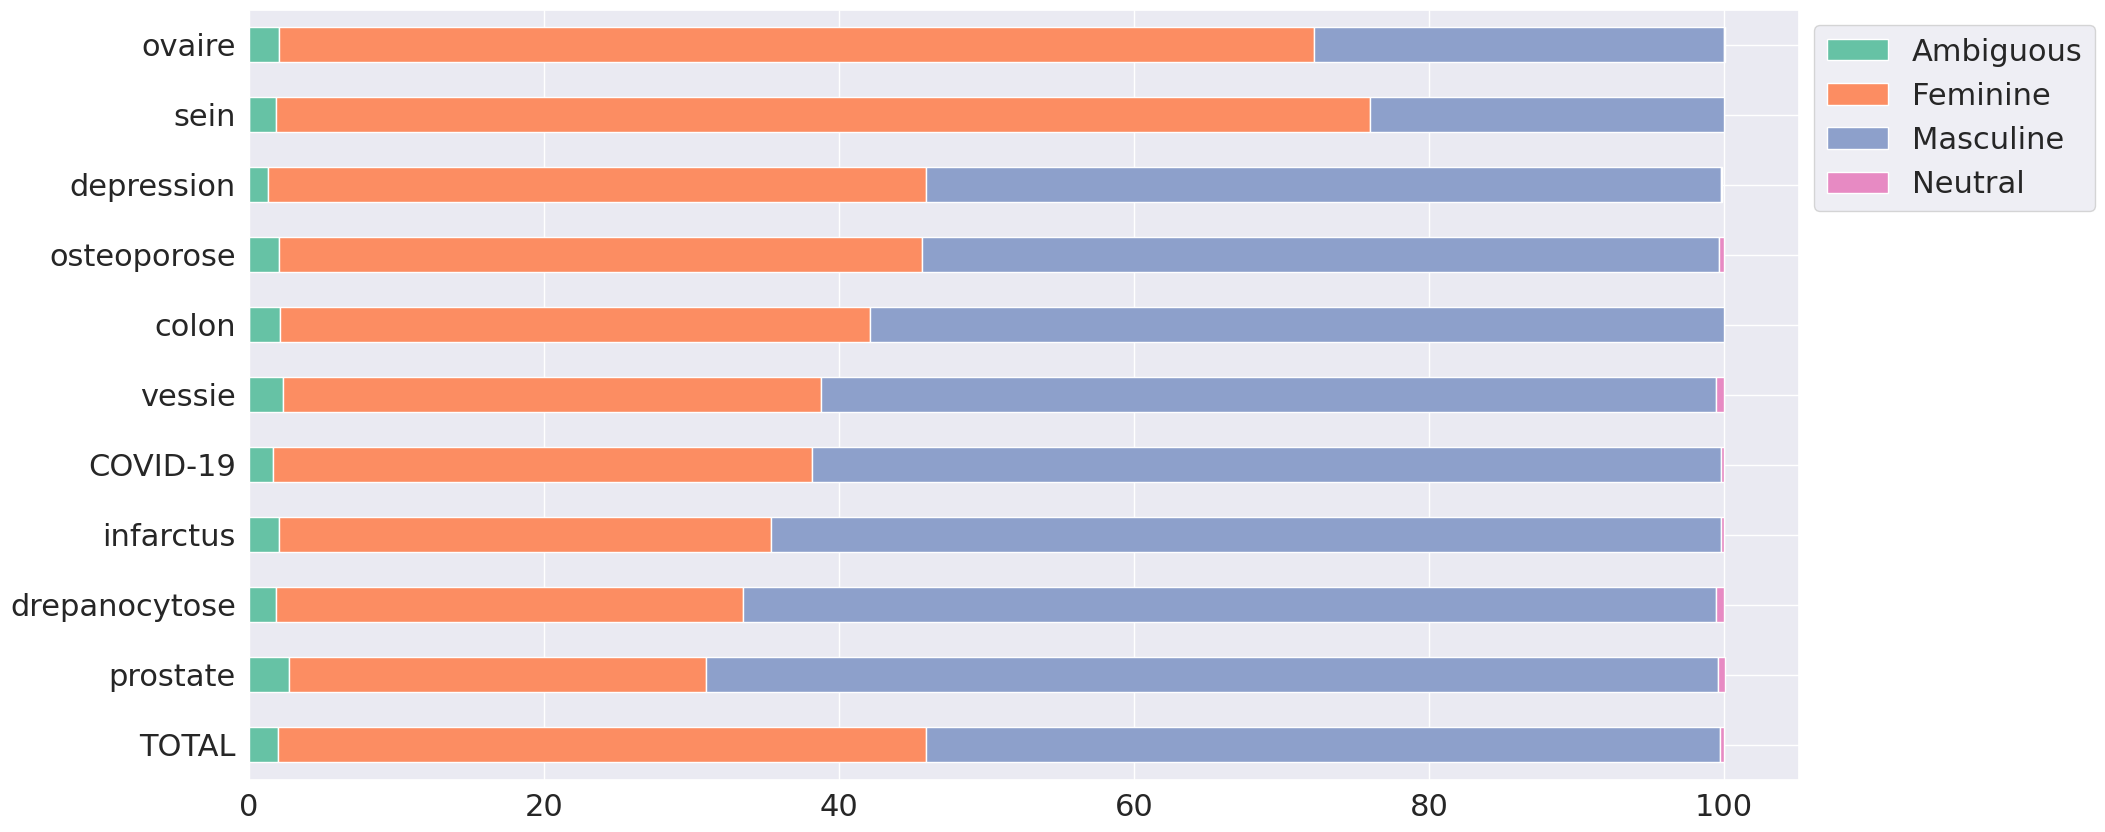

In [90]:
"""FIGURE ET TABLEAU POUR CES THÈMES"""

masc_gap = all_masc_gap
fem_gap = all_fem_gap
warnings.filterwarnings('ignore')
topics = [el[0] for el in masc_gap]+[el[0] for el in fem_gap]

table = []

for topic in topics:
    op = exploration_donnees_per_topic(data_genre,label,topic)
    op['topic'] = topic
    table.append(op)

print(tabulate(table, headers='keys'))

for d in table:
    if "Ambiguous" not in d:
        d["Ambiguous"]="0%"
    if "Neutral" not in d:
        d["Neutral"]="0%"
        
table_new = [{"Neutral":float(d["Neutral"][:-1]), "Feminine":float(d["Feminine"][:-1]),
             "Masculine":float(d["Masculine"][:-1]),"Ambiguous":float(d["Ambiguous"][:-1])} for d in table]


# ajouter une barre pour le total
total = {}
for genre in sorted(["Masculine", "Feminine", "Neutral", "Ambiguous"]):
    n = sum([dic[genre] for dic in table_new])
    total[genre] = n/len(table_new)
    
#table_new.append(total)
table_new.insert(0,total)

print(table_new)

df = pd.DataFrame(table_new, index=["TOTAL"]+topics)
ax = df.plot(kind="barh", stacked=True, color=sns.color_palette("Set2"))
#ax.set_title("",color='black')
ax.legend(bbox_to_anchor=(1.0, 1.0))
#plt.savefig("fig/gender_per_topic_10biased.png",bbox_inches = "tight")
ax.plot()

In [103]:
#means = {"total":mean_gap_total}
means = {}
for model in modeles:
    sorted_gap, masc_gap, fem_gap = biased_topics(topics,data_genre[data_genre["model"] == model])
    mean_gap = sum([el[1] for el in sorted_gap])/len(sorted_gap)
    #print(model, mean_gap)
    means[model]=round(mean_gap,3)
    
means

{'Llama-3-1-8B-Instruct-bf': 6.79,
 'Llama-3-1-8B-bf': 4.07,
 'bloom-7b1': 13.53,
 'vigogne-2-13b': 15.57,
 'vigogne-2-7b': -1.17,
 'bloom-1b1': 9.1,
 'BioMistral-7b-SLERP': 21.91}

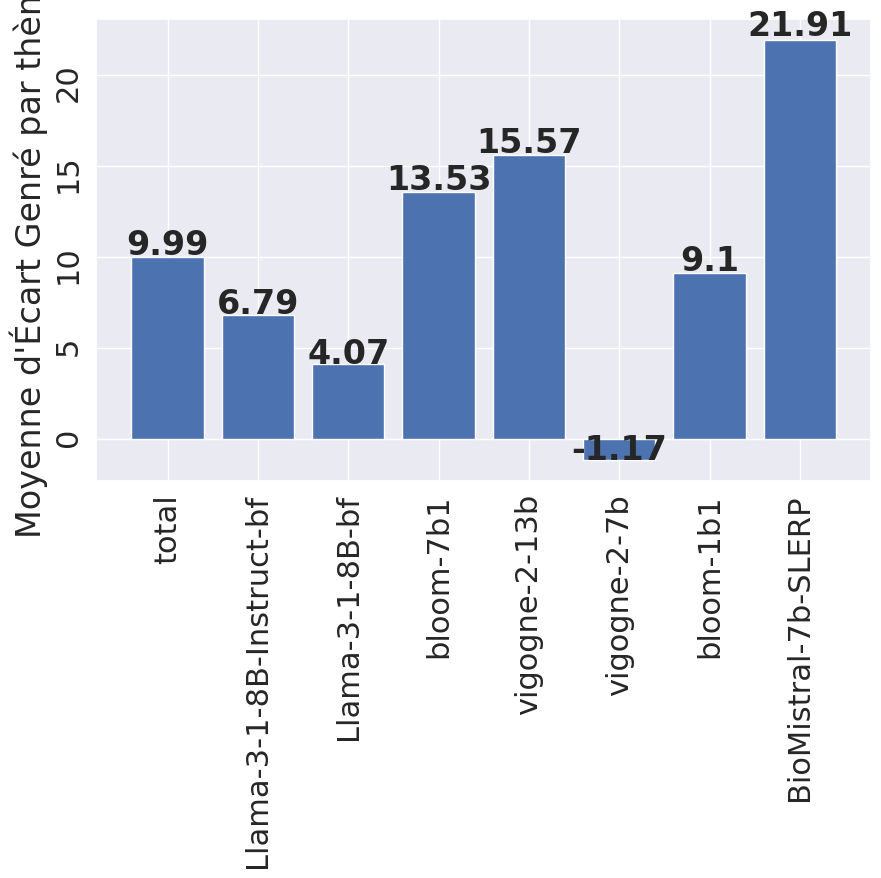

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(list(means.keys()), list(means.values()))
ax.tick_params(labelrotation=90) 
ax.set_ylabel("Moyenne d'Écart Genré par thème")
#ax.set_title('Problèmes de qualité de données')
i = 0
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             round(list(means.values())[i],2),
             ha='center',
             weight='bold')
    i+=1
    
#plt.savefig("fig/moy_gap_topic_model.png")

In [106]:
# RADAR PLOT
#TODO: ajouter une ligne pour la moyenne? 

import plotly.express as px
import pandas as pd
df_ideal = pd.DataFrame(dict(r=[0,0,0,0,0,0,0], theta=list(means.keys())))
df_avg = pd.DataFrame(dict(r=[mean_gap_total,mean_gap_total,mean_gap_total,mean_gap_total,mean_gap_total,mean_gap_total,mean_gap_total], theta=list(means.keys())))
df = pd.DataFrame(dict(
    r = list(means.values()),
    theta = list(means.keys())
))
df["Values"] = "Real"
df_ideal["Values"] = "Ideal"
df_avg["Values"] = "Mean (total)"
df_concat = pd.concat([df,df_ideal, df_avg], axis=0)
fig = px.line_polar(df_concat, r='r', theta='theta', line_close=True, range_r=[-50,50], color='Values')
fig.show()


In [102]:
means

{'Llama-3-1-8B-Instruct-bf': 6.79,
 'Llama-3-1-8B-bf': 4.07,
 'bloom-7b1': 13.53,
 'vigogne-2-13b': 15.57,
 'vigogne-2-7b': -1.17,
 'bloom-1b1': 9.1,
 'BioMistral-7b-SLERP': 21.91,
 'ideal': [0, 0, 0, 0, 0, 0, 0]}

In [109]:
def gap(topics,data_genre):
    gap = {}  # seulement topic et gap
    for topic in topics:
        op = exploration_donnees_per_topic(data_genre, label,topic)
        # gap masc-fem donc si positifs, biaisé vers Masc, si négatif, biaisé vers Fem
        try:
            m = float(op['Masculine'][:-1])
        except KeyError:
            m = 0

        try:
            f = float(op['Feminine'][:-1])
        except KeyError:
            f = 0

        gap[topic] = m - f
        sorted_gap = trier_dic(gap)

    return sorted_gap

sorted_gap = gap(topics,data_genre)
print(sorted_gap)
mean_gap = sum([el[1] for el in sorted_gap])/len(sorted_gap)
#print(mean_gap)
#sorted_gap["total"]=mean_gap


[['prostate', 40.3], ['drepanocytose', 34.3], ['infarctus', 31.000000000000007], ['COVID-19', 25.0], ['vessie', 24.200000000000003], ['colon', 17.9], ['osteoporose', 10.5], ['depression', 9.299999999999997], ['ovaire', -42.400000000000006], ['sein', -50.2]]


In [112]:
#TODO: ajouter une ligne pour la moyenne? et une pour idéal?

df_ideal = pd.DataFrame(dict(r=[0,0,0,0,0,0,0,0,0,0], theta=[el[0] for el in sorted_gap]))
df_avg = pd.DataFrame(dict(r=[mean_gap,mean_gap,mean_gap,mean_gap,mean_gap,mean_gap,mean_gap,mean_gap, mean_gap, mean_gap], theta=[el[0] for el in sorted_gap]))

df = pd.DataFrame(dict(
    r = [el[1] for el in sorted_gap],
    theta = [el[0] for el in sorted_gap]
))
df["Values"] = "Real"
df_ideal["Values"] = "Ideal"
df_avg["Values"] = "Mean (total)"
df_concat = pd.concat([df,df_ideal, df_avg], axis=0)


fig = px.line_polar(df_concat, r='r', theta='theta', line_close=True, range_r=[-50,50], color='Values')
fig.show()

In [59]:
def viz_per_topic(dataset):
    """Seulement sur thèmes biaisés, sinon trop"""
    topics = list(set(dataset["pathologie"]))
    #topics = biased_topics(all_topics, dataset)[0][:10] + biased_topics(all_topics, dataset)[0][-10:]
    bias = [el[0] for el in all_sorted_gap[:10]] + [el[0] for el in all_sorted_gap[-10:]]
    #print(bias)
    table = []

    for topic in topics:
        op = exploration_donnees_per_topic(dataset,label,topic)
        op['topic'] = topic
        if topic in bias:
            table.append(op)

    print(tabulate(table, headers='keys'))

    #table_new = dic_list_noempty(table)
    table_new = table

    print(table_new)
    # ajouter une barre pour le total
    total = {}
    for genre in ["Masculine", "Feminine", "Neutral", "Ambiguous"]:
        n1 = [dic[genre] for dic in table_new]
        n2 = [float(el[:-1]) for el in n1]
        n = sum(n2)
        total[genre] = n/len(table_new)
        
    table_new.insert(0,total)
    print("**************")
    print(table_new)
    
    df = pd.DataFrame(table_new, index=["TOTAL"]+bias)
    ax = df.plot(kind="barh", stacked=True, color=sns.color_palette("Set2"))
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    #plt.savefig("fig/auto_gender_per_topic_10gold.png",bbox_inches = "tight")
    #ax.plot()

viz_per_topic(data_genre)

Masculine    Feminine    Ambiguous    Neutral    topic
-----------  ----------  -----------  ---------  -------------
61.6%        36.6%       1.6%         0.2%       COVID-19
27.8%        70.2%       2.0%         0.1%       ovaire
66.0%        31.7%       1.8%         0.5%       drepanocytose
57.9%        40.0%       2.1%         0.0%       colon
54.1%        43.6%       2.0%         0.3%       osteoporose
24.0%        74.2%       1.8%         0.0%       sein
60.7%        36.5%       2.3%         0.5%       vessie
68.6%        28.3%       2.7%         0.5%       prostate
64.4%        33.4%       2.0%         0.2%       infarctus
53.9%        44.6%       1.3%         0.1%       depression
[{'Masculine': '61.6%', 'Feminine': '36.6%', 'Ambiguous': '1.6%', 'Neutral': '0.2%', 'topic': 'COVID-19'}, {'Feminine': '70.2%', 'Masculine': '27.8%', 'Ambiguous': '2.0%', 'Neutral': '0.1%', 'topic': 'ovaire'}, {'Masculine': '66.0%', 'Feminine': '31.7%', 'Ambiguous': '1.8%', 'Neutral': '0.5%', 'topic'

ValueError: Length of values (11) does not match length of index (21)

In [ ]:
df = pd.DataFrame(dict(
    r = list(means.values()),
    theta = list(means.keys())
))
fig = px.line_polar(df, r='r', theta='theta', line_close=True, range_r=[-50,50])
fig.show()

## Croisement proportions genre par modèle ET par domaine professionnel


 Llama-3-1-8B-Instruct-bf
Masculine    Feminine    Ambiguous    topic          Neutral
-----------  ----------  -----------  -------------  ---------
67.3%        30.0%       2.7%         prostate
65.7%        33.0%       1.3%         drepanocytose
65.3%        33.0%       1.7%         infarctus
63.0%        36.0%       0.7%         COVID-19       0.3%
60.7%        37.0%       2.3%         vessie
59.3%        38.7%       2.0%         colon
52.0%        46.3%       1.7%         osteoporose
16.0%        81.0%       2.7%         sein           0.3%
28.3%        69.0%       2.7%         ovaire
46.3%        52.0%       1.7%         depression

 Llama-3-1-8B-bf
Masculine    Feminine    Ambiguous    topic          Neutral
-----------  ----------  -----------  -------------  ---------
62.3%        33.3%       4.3%         prostate
63.7%        34.7%       1.7%         infarctus
60.0%        36.7%       3.0%         drepanocytose  0.3%
58.3%        39.0%       2.3%         COVID-19       0.3%


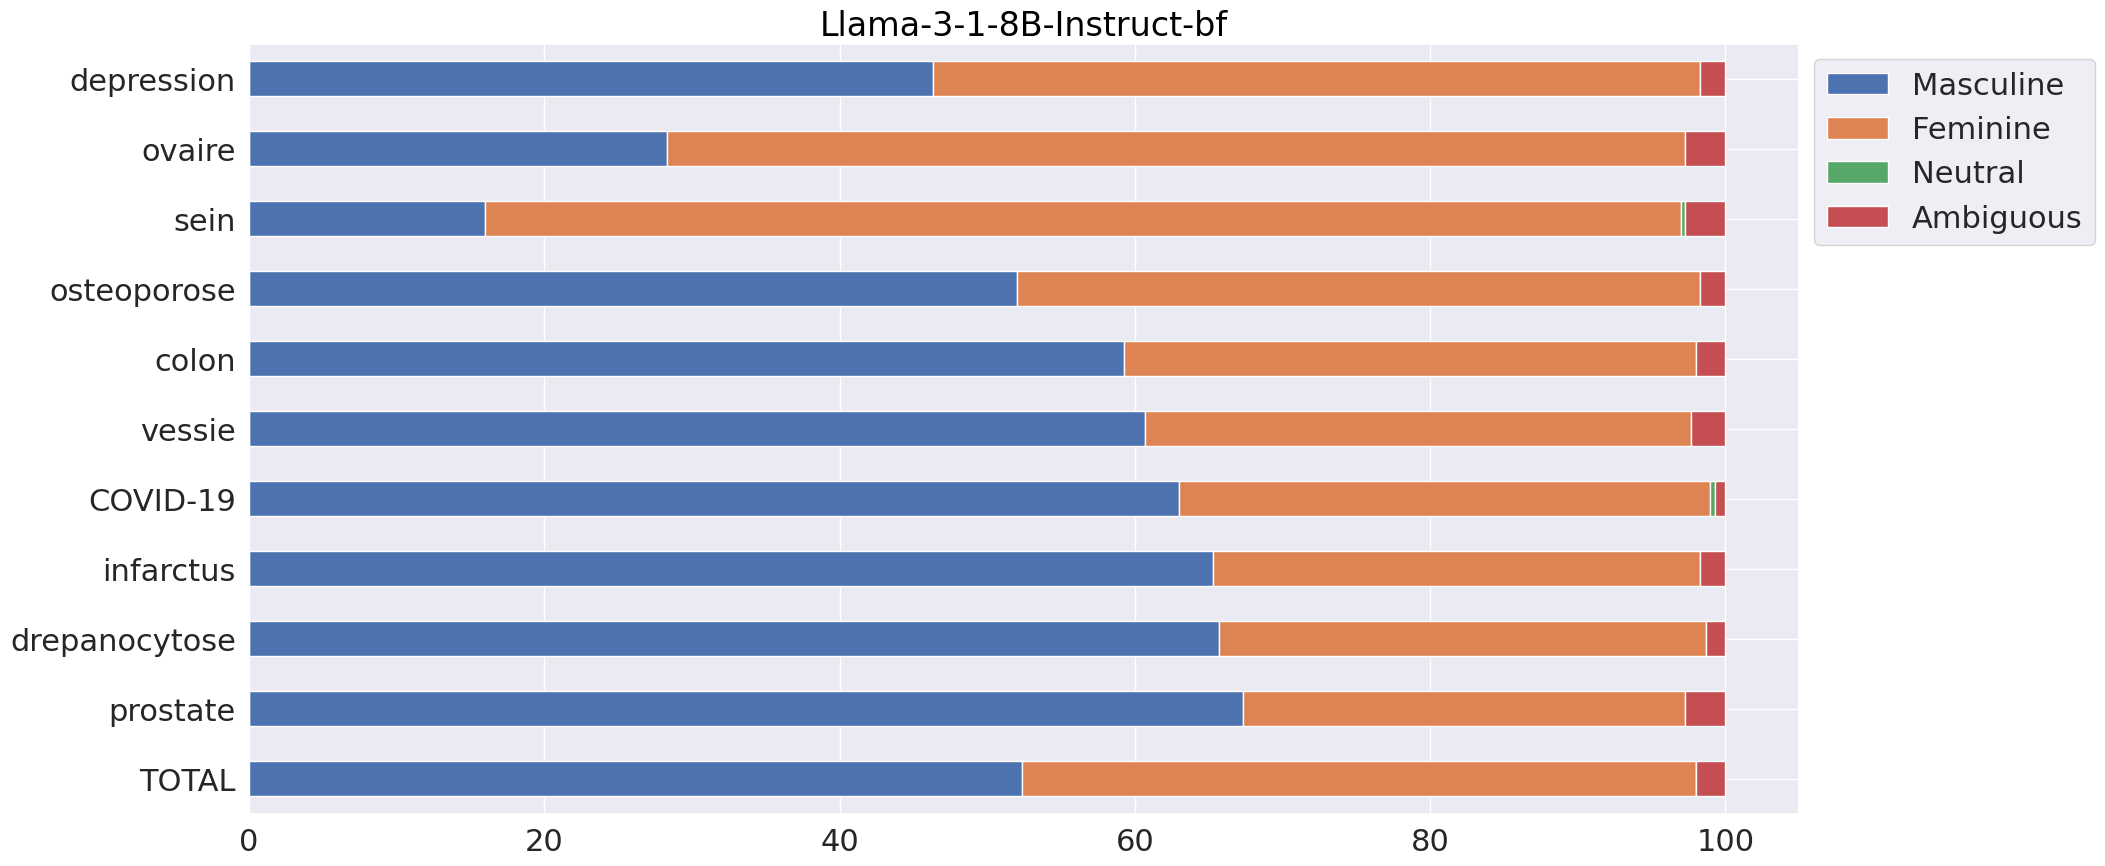

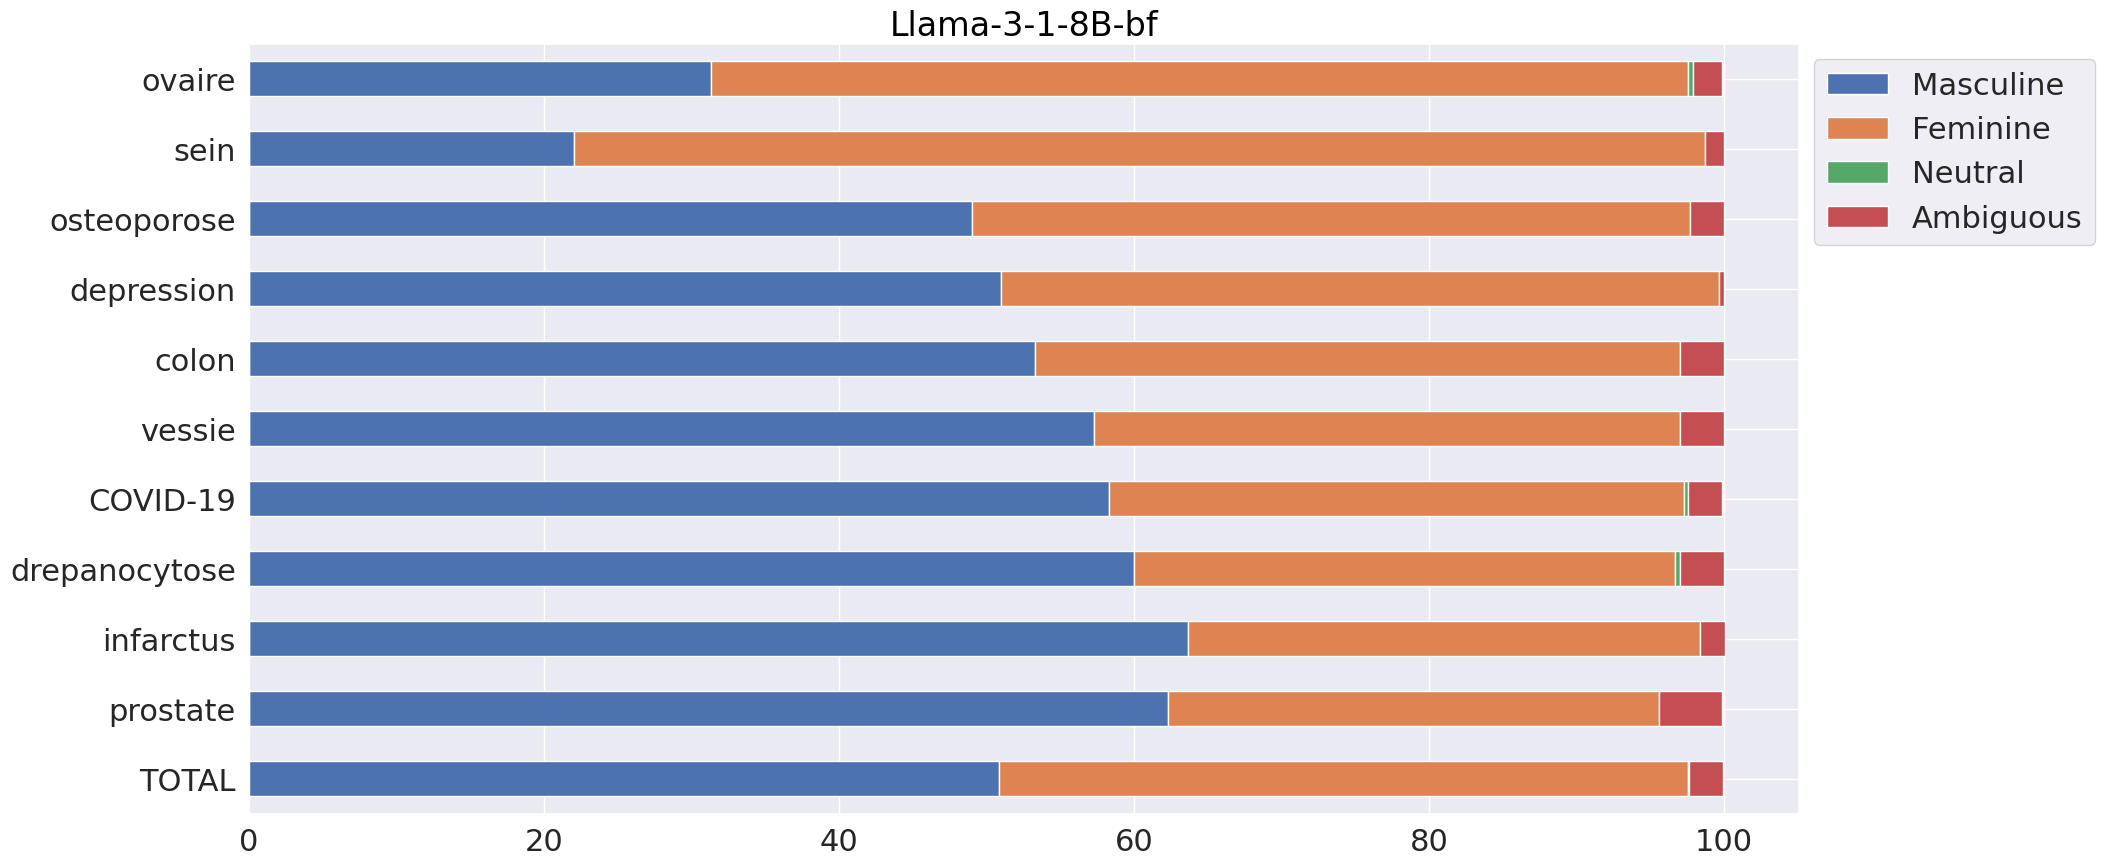

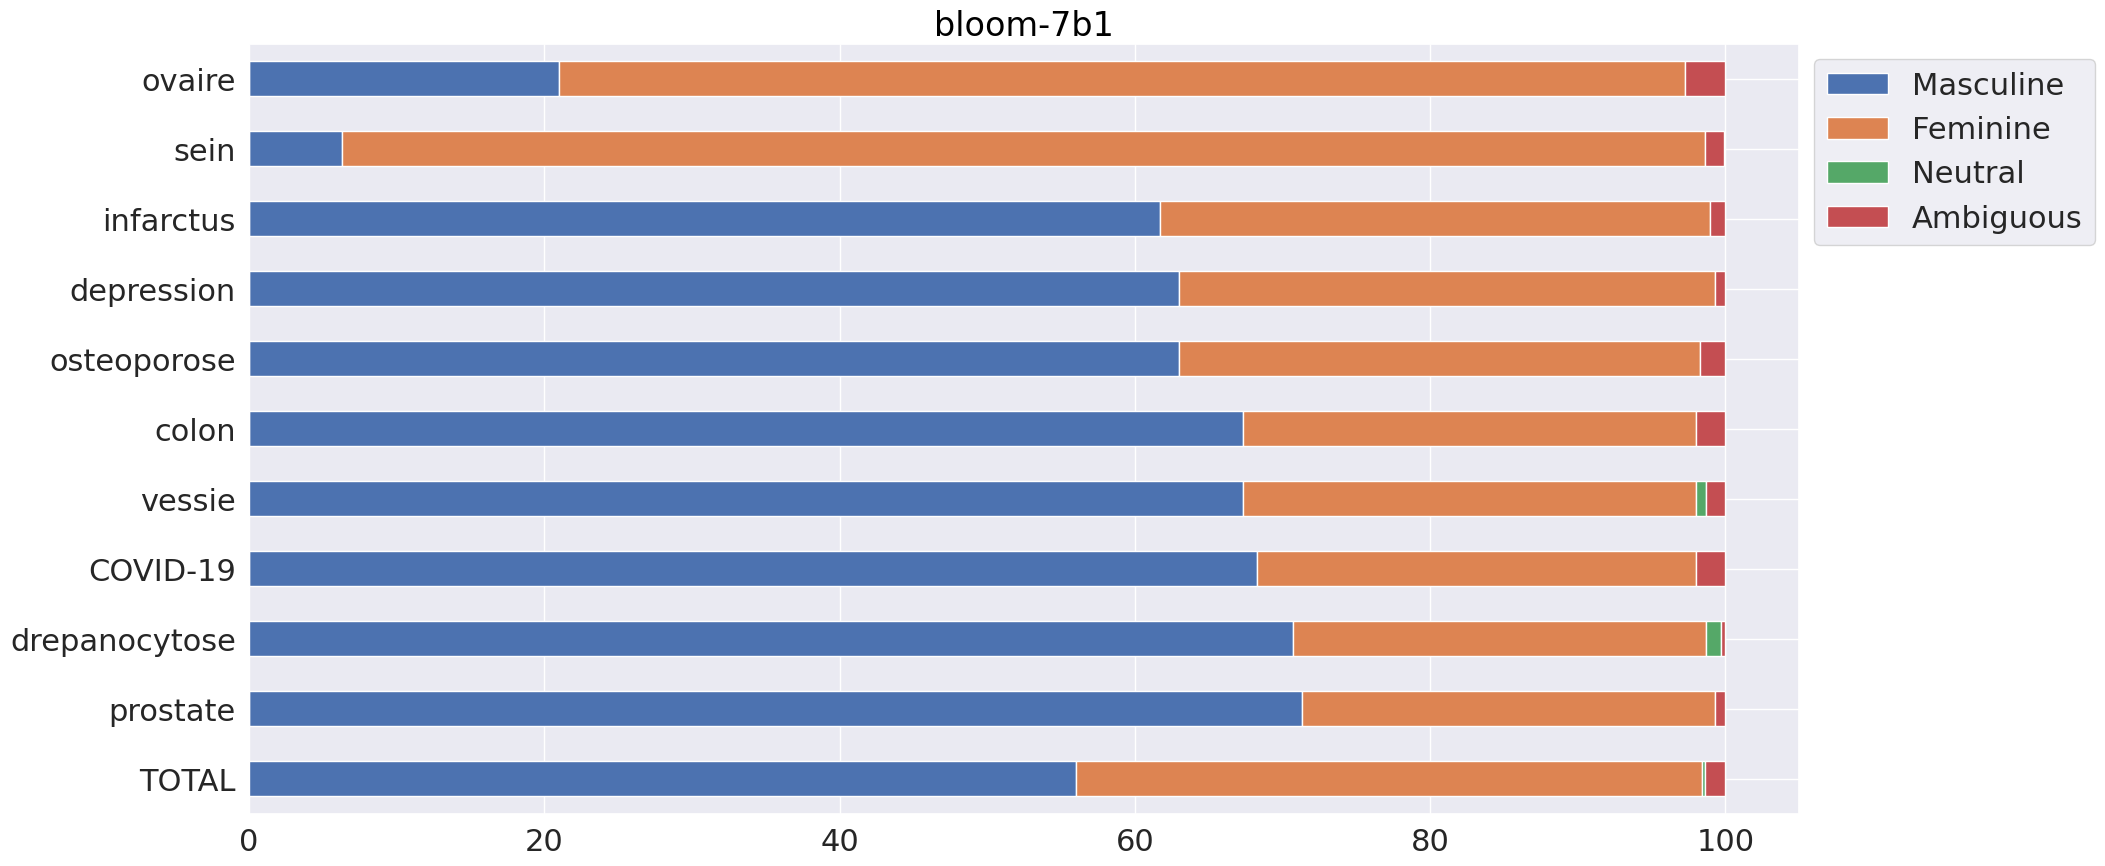

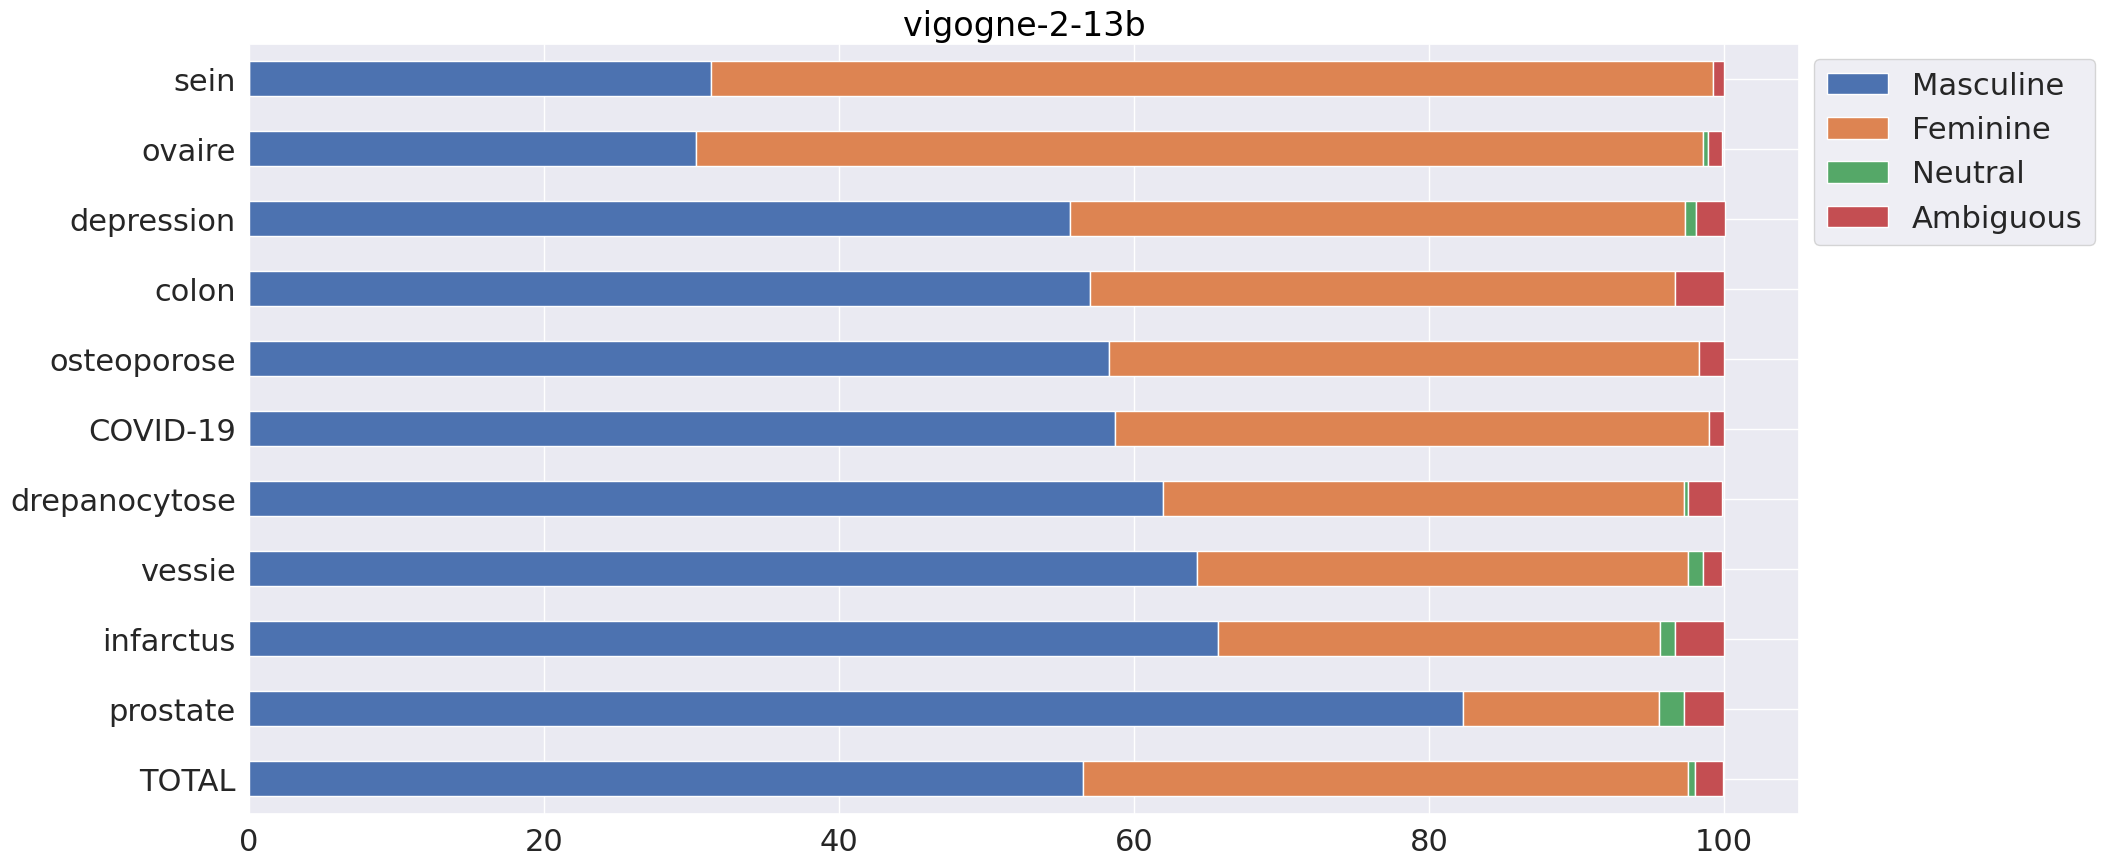

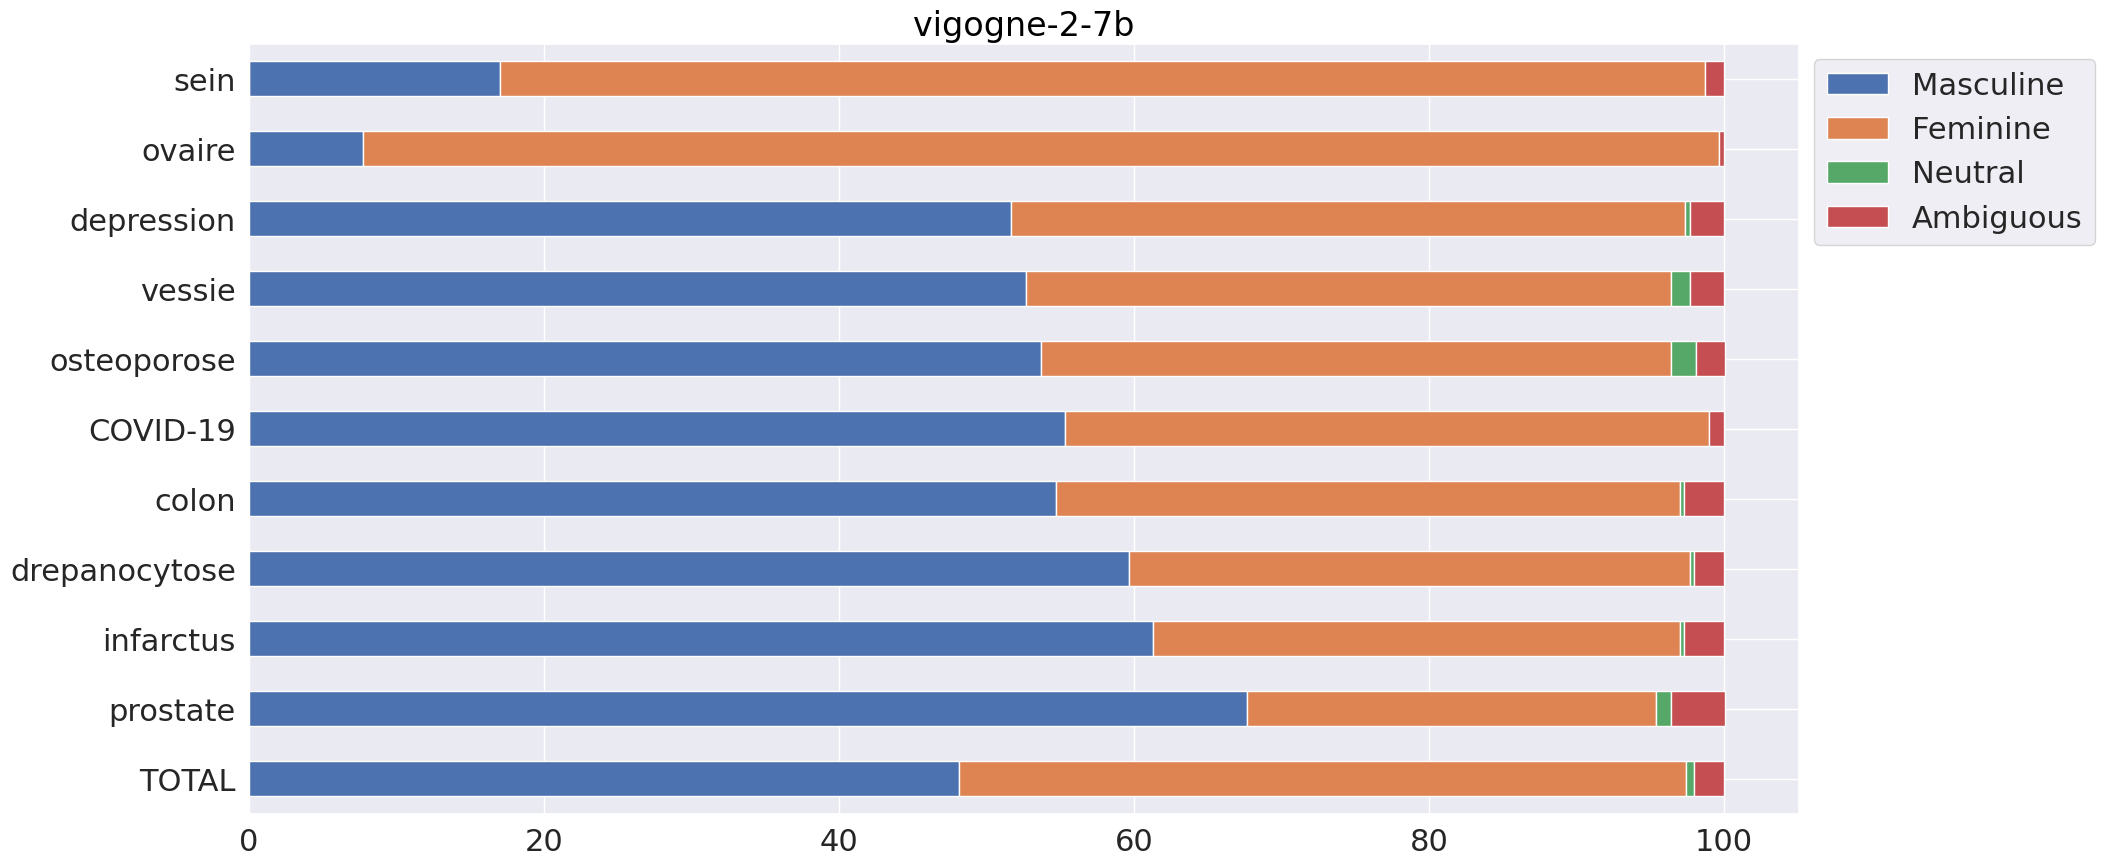

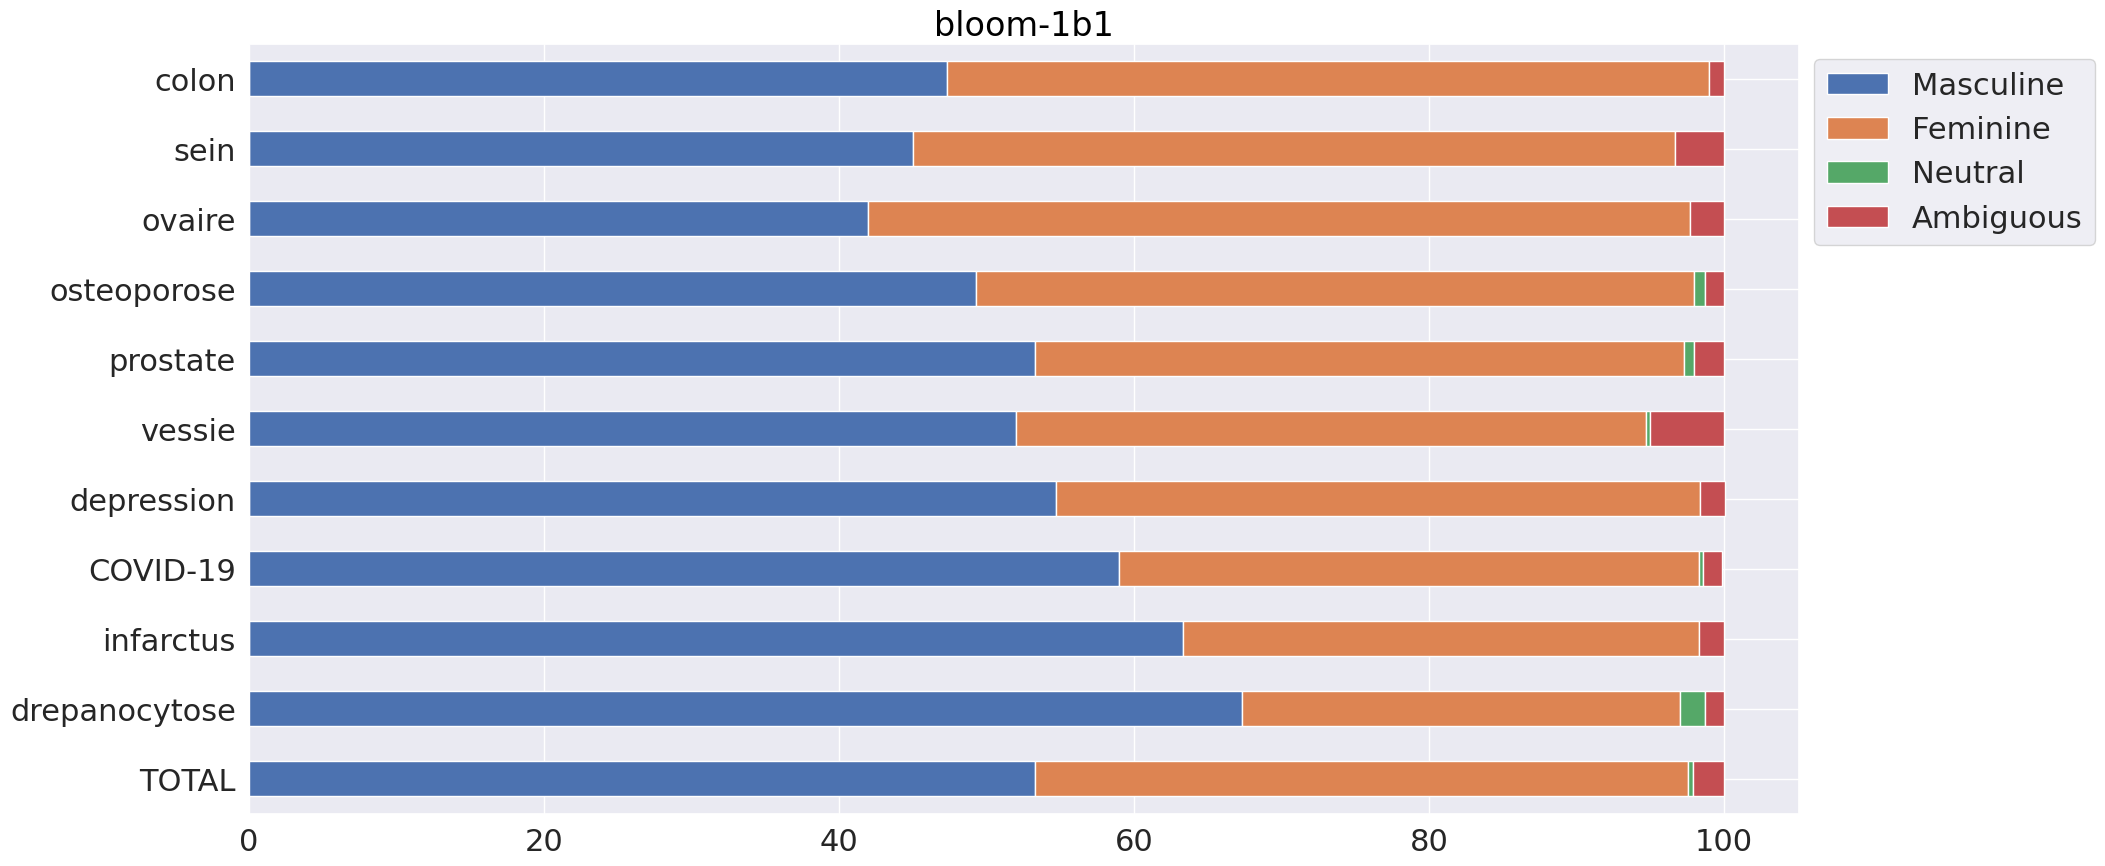

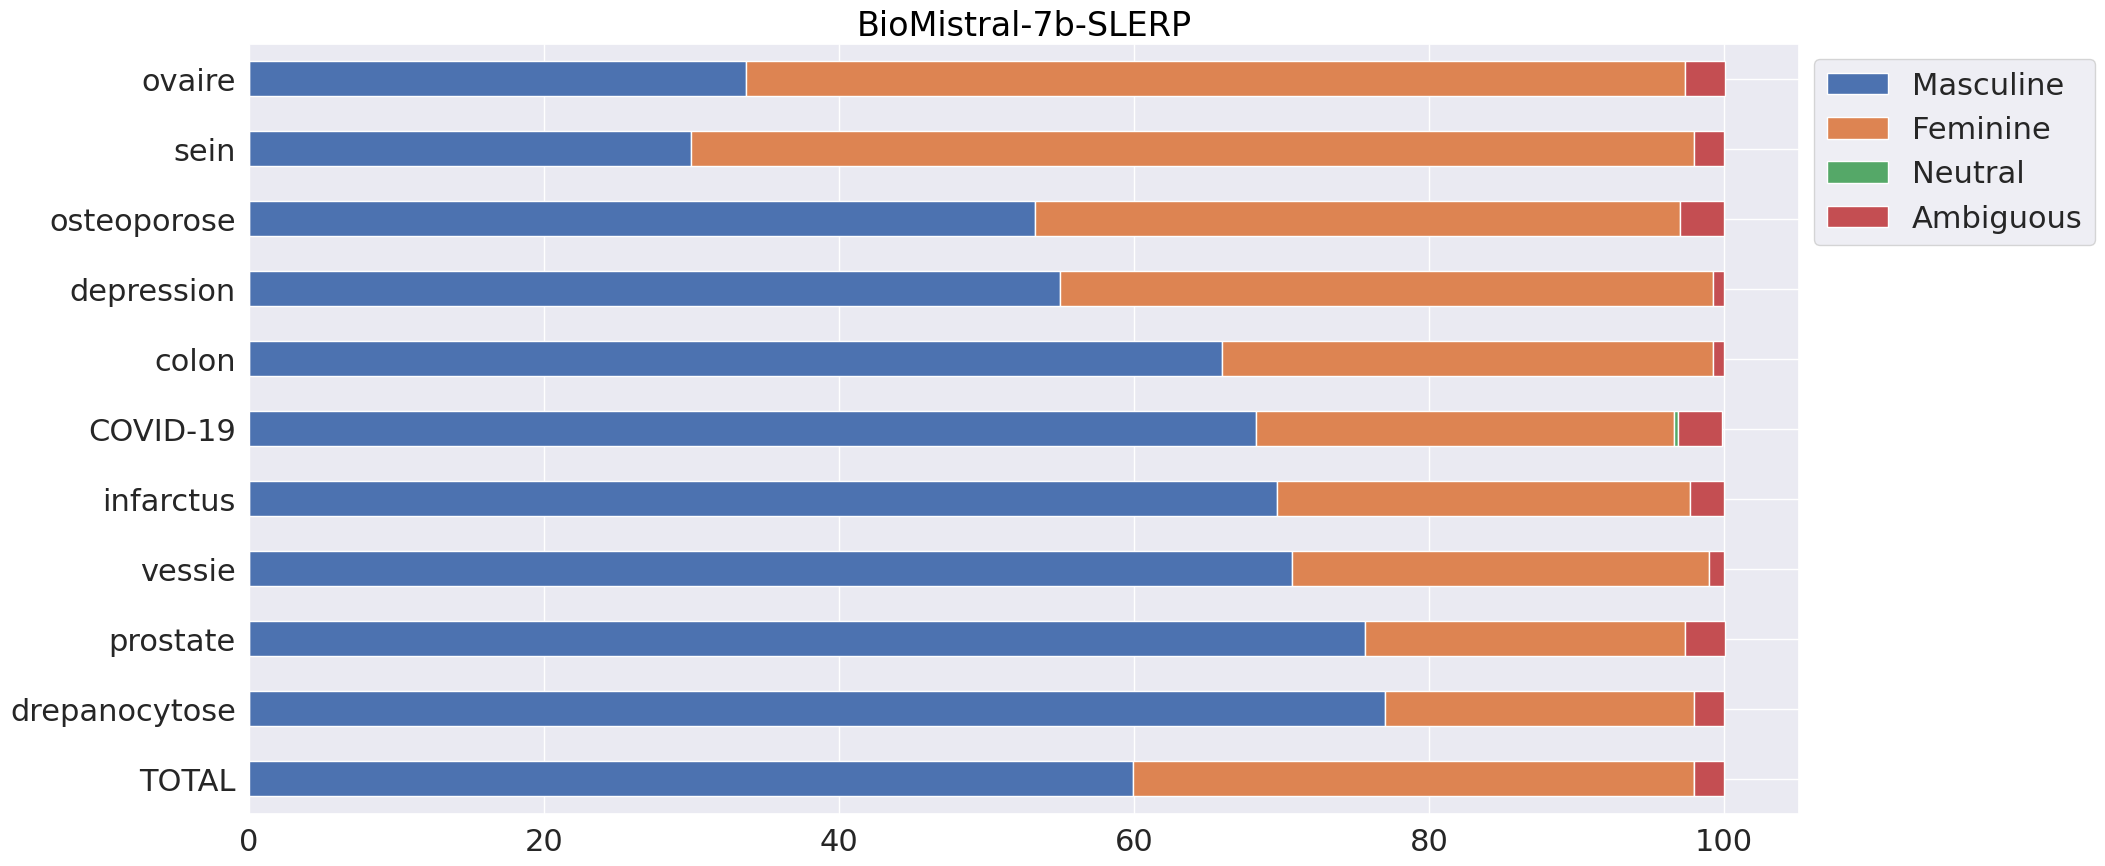

In [31]:
import warnings
def exploration_donnees_per_topic_model(dataset, golden_gender,model, topic ,savecsv=False, savefig = False):
    
    dataset = dataset[dataset["pathologie"] == topic]
    dataset = dataset[dataset["model"] == model]
    x_fig = dataset[golden_gender].value_counts(normalize=True)
    x=dataset[golden_gender].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
    titre = f"Nombre d'instances par étiquette pour {model}, {topic}\n"
    
    if savecsv:
        x.to_csv(f"value_counts_{label}_{model}_{topic}.csv")
        
    return x.to_dict()

warnings.filterwarnings('ignore')

all_topics = list(set(data_genre["pathologie"]))
topic_mod = {}

"""Ordre par modèle, puis par topic"""
for model in modeles:
    table = []
    sorted_gap, masc_gap, fem_gap = biased_topics(all_topics,data_genre[data_genre["model"] == model])
    #topics = [el[0] for el in masc_gap[:5]]+[el[0] for el in fem_gap[:5]]
    topics = [el[0] for el in masc_gap]+[el[0] for el in fem_gap]
    topic_mod[model]=topics
    for topic in topics:
        op = exploration_donnees_per_topic_model(data_genre,label,model,topic)
        op['topic'] = topic
        table.append(op)

    print("\n",model)
    print(tabulate(table, headers='keys'))
    
    for d in table:
        for genre in ["Neutral","Feminine", "Masculine","Ambiguous"]:
            if genre not in d:
                d[genre]="0%"
    table_new = [{"Neutral":float(d["Neutral"][:-1]), "Feminine":float(d["Feminine"][:-1]),
                 "Masculine":float(d["Masculine"][:-1]),"Ambiguous":float(d["Ambiguous"][:-1])} for d in table]
    # ajouter une barre pour le total
    total = {}
    for genre in ["Masculine", "Feminine", "Neutral", "Ambiguous"]:
        n = sum([dic[genre] for dic in table_new])
        total[genre] = n/len(table_new)

    #table_new.append(total)
    table_new.insert(0,total)

        
    df = pd.DataFrame(table_new, index=["TOTAL"]+topics)
    ax = df.plot(kind="barh", stacked=True)
    ax.set_title(model,color='black')
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    #plt.savefig(f"fig/auto_gender_per_model+topic_{model}.png",bbox_inches = "tight")
    ax.plot()


 drepanocytose
Masculine    Feminine    Ambiguous    model                     Neutral
-----------  ----------  -----------  ------------------------  ---------
65.7%        33.0%       1.3%         Llama-3-1-8B-Instruct-bf
60.0%        36.7%       3.0%         Llama-3-1-8B-bf           0.3%
70.7%        28.0%       0.3%         bloom-7b1                 1.0%
62.0%        35.3%       2.3%         vigogne-2-13b             0.3%
59.7%        38.0%       2.0%         vigogne-2-7b              0.3%
67.3%        29.7%       1.3%         bloom-1b1                 1.7%
77.0%        21.0%       2.0%         BioMistral-7b-SLERP

 prostate
Masculine    Feminine    Ambiguous    model                     Neutral
-----------  ----------  -----------  ------------------------  ---------
67.3%        30.0%       2.7%         Llama-3-1-8B-Instruct-bf
62.3%        33.3%       4.3%         Llama-3-1-8B-bf
71.3%        28.0%       0.7%         bloom-7b1
82.3%        13.3%       2.7%         vigogne-2-13

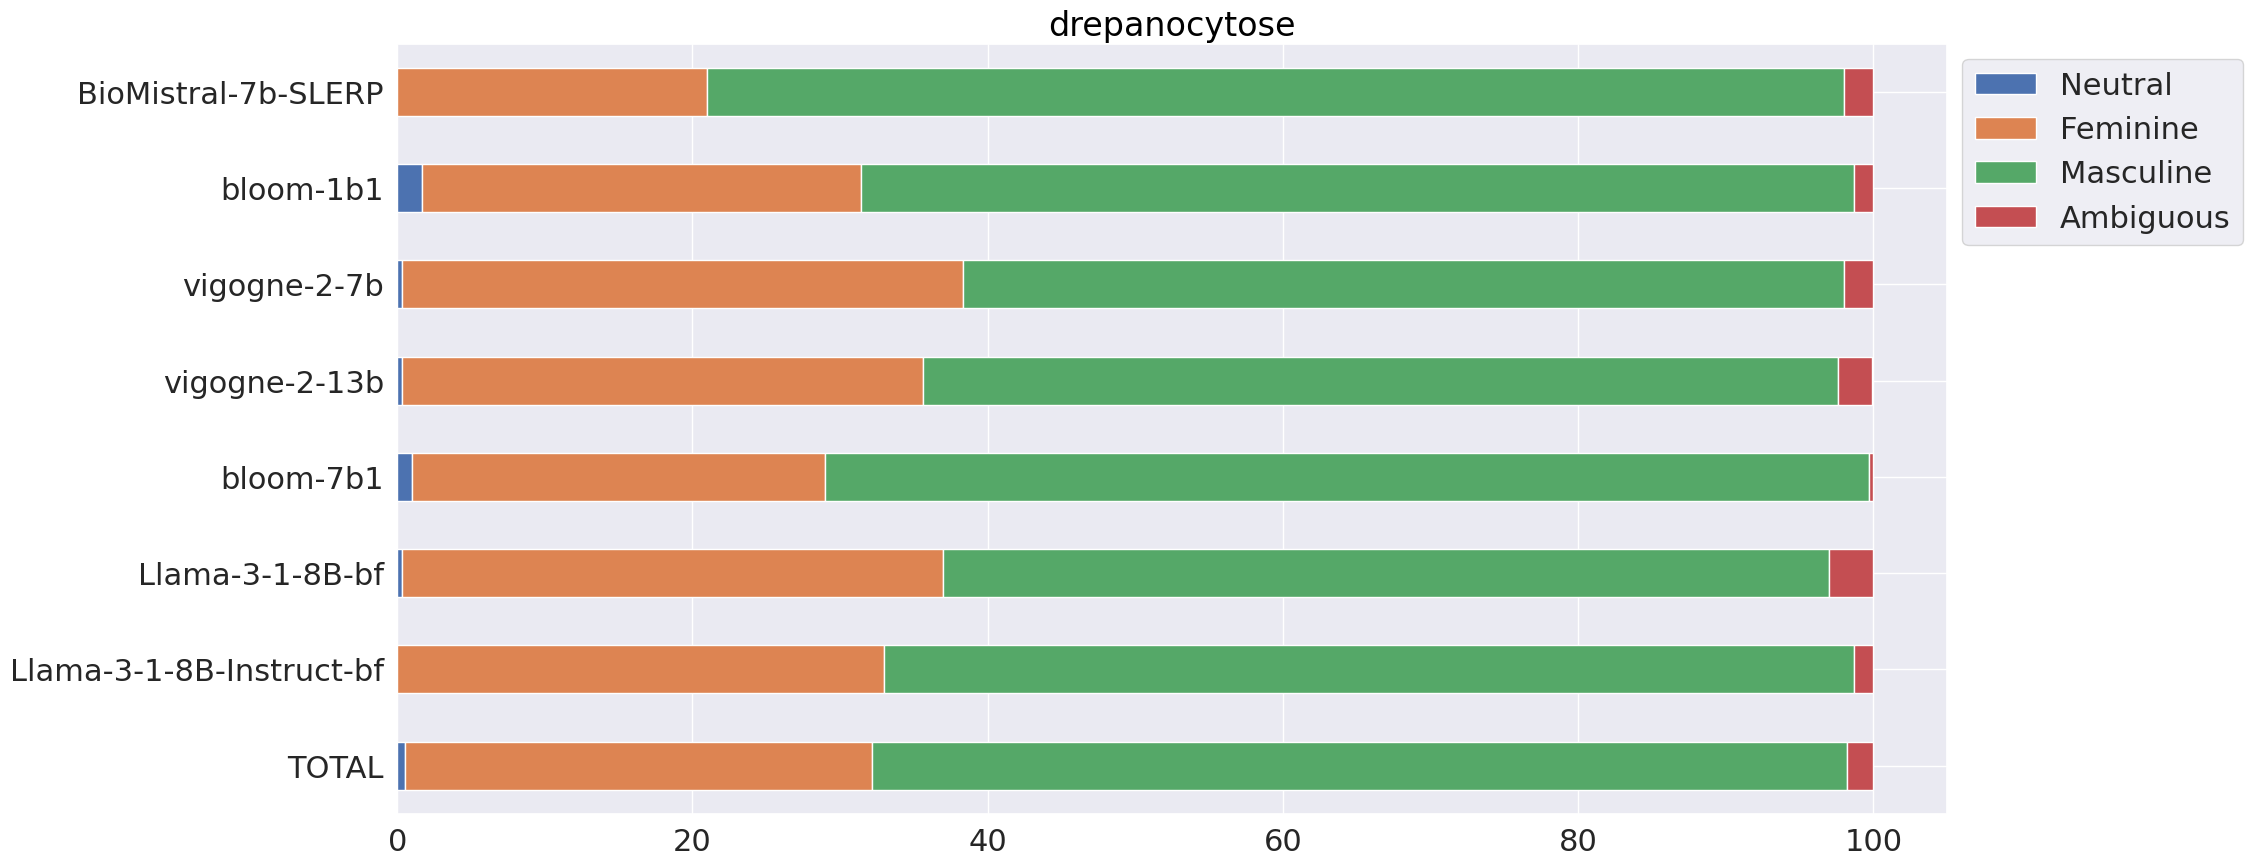

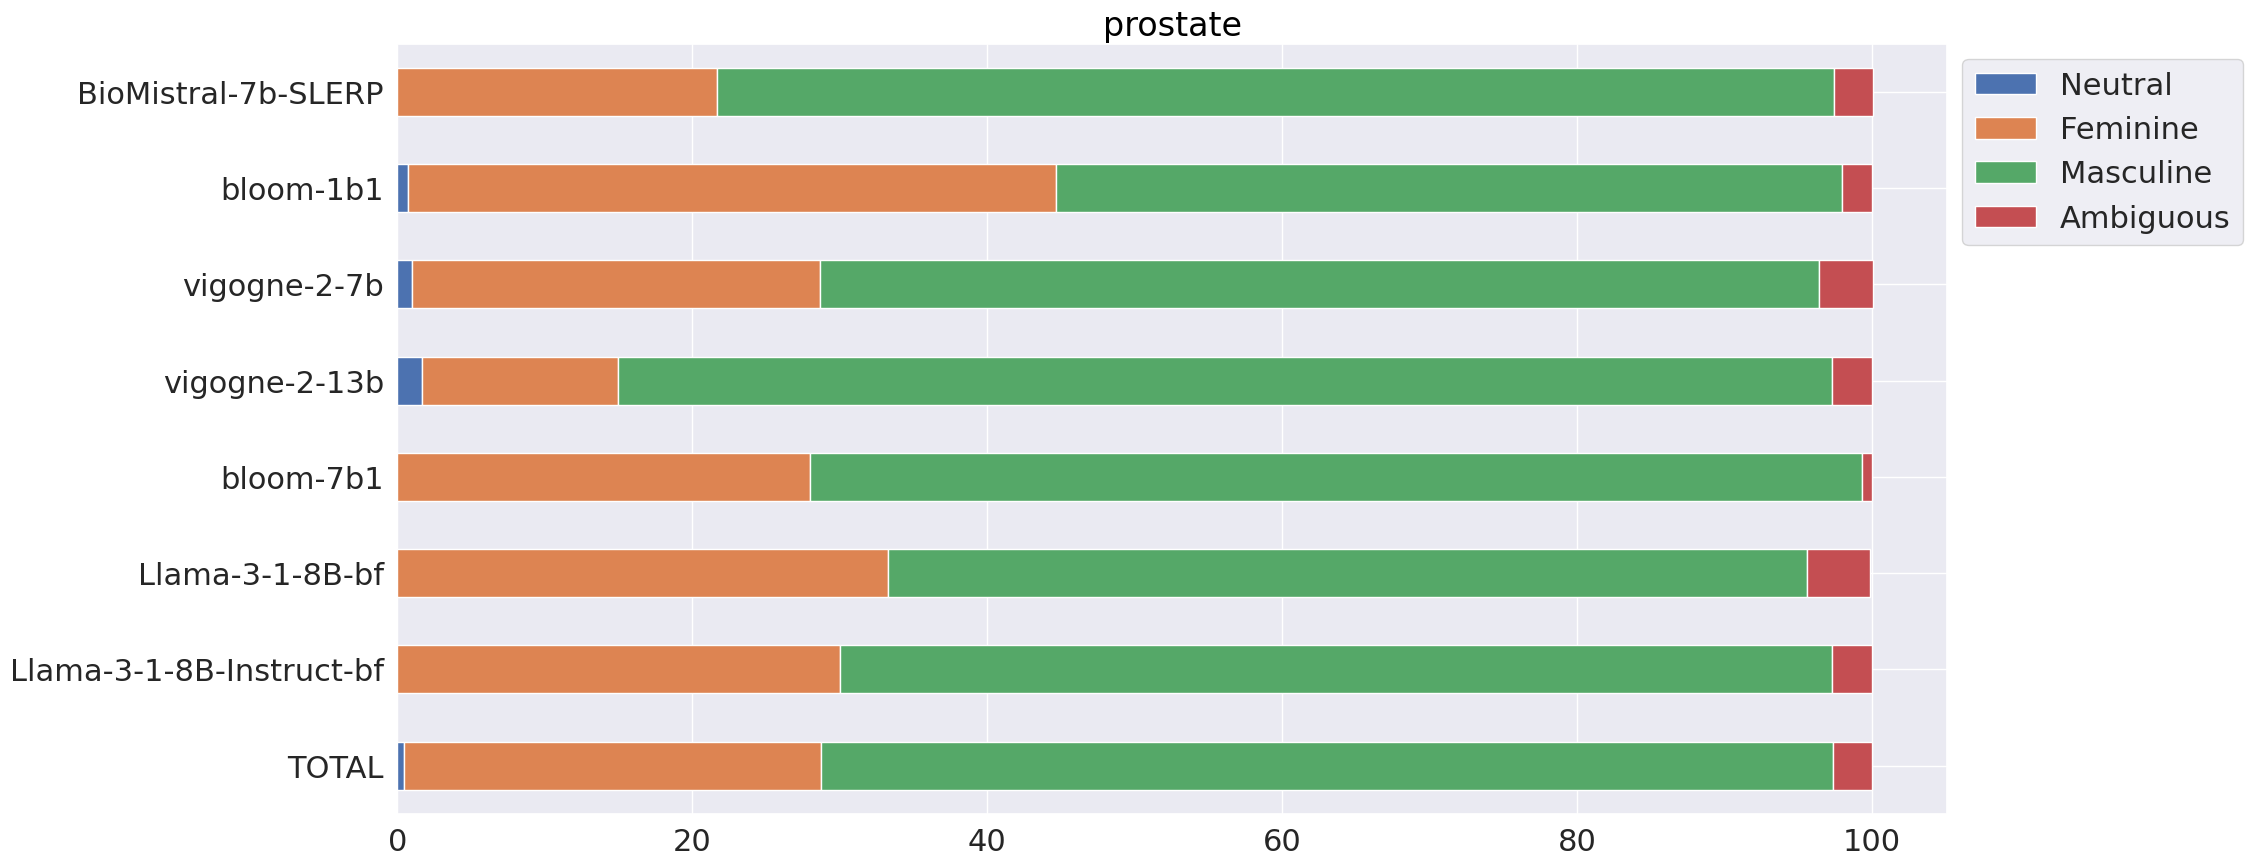

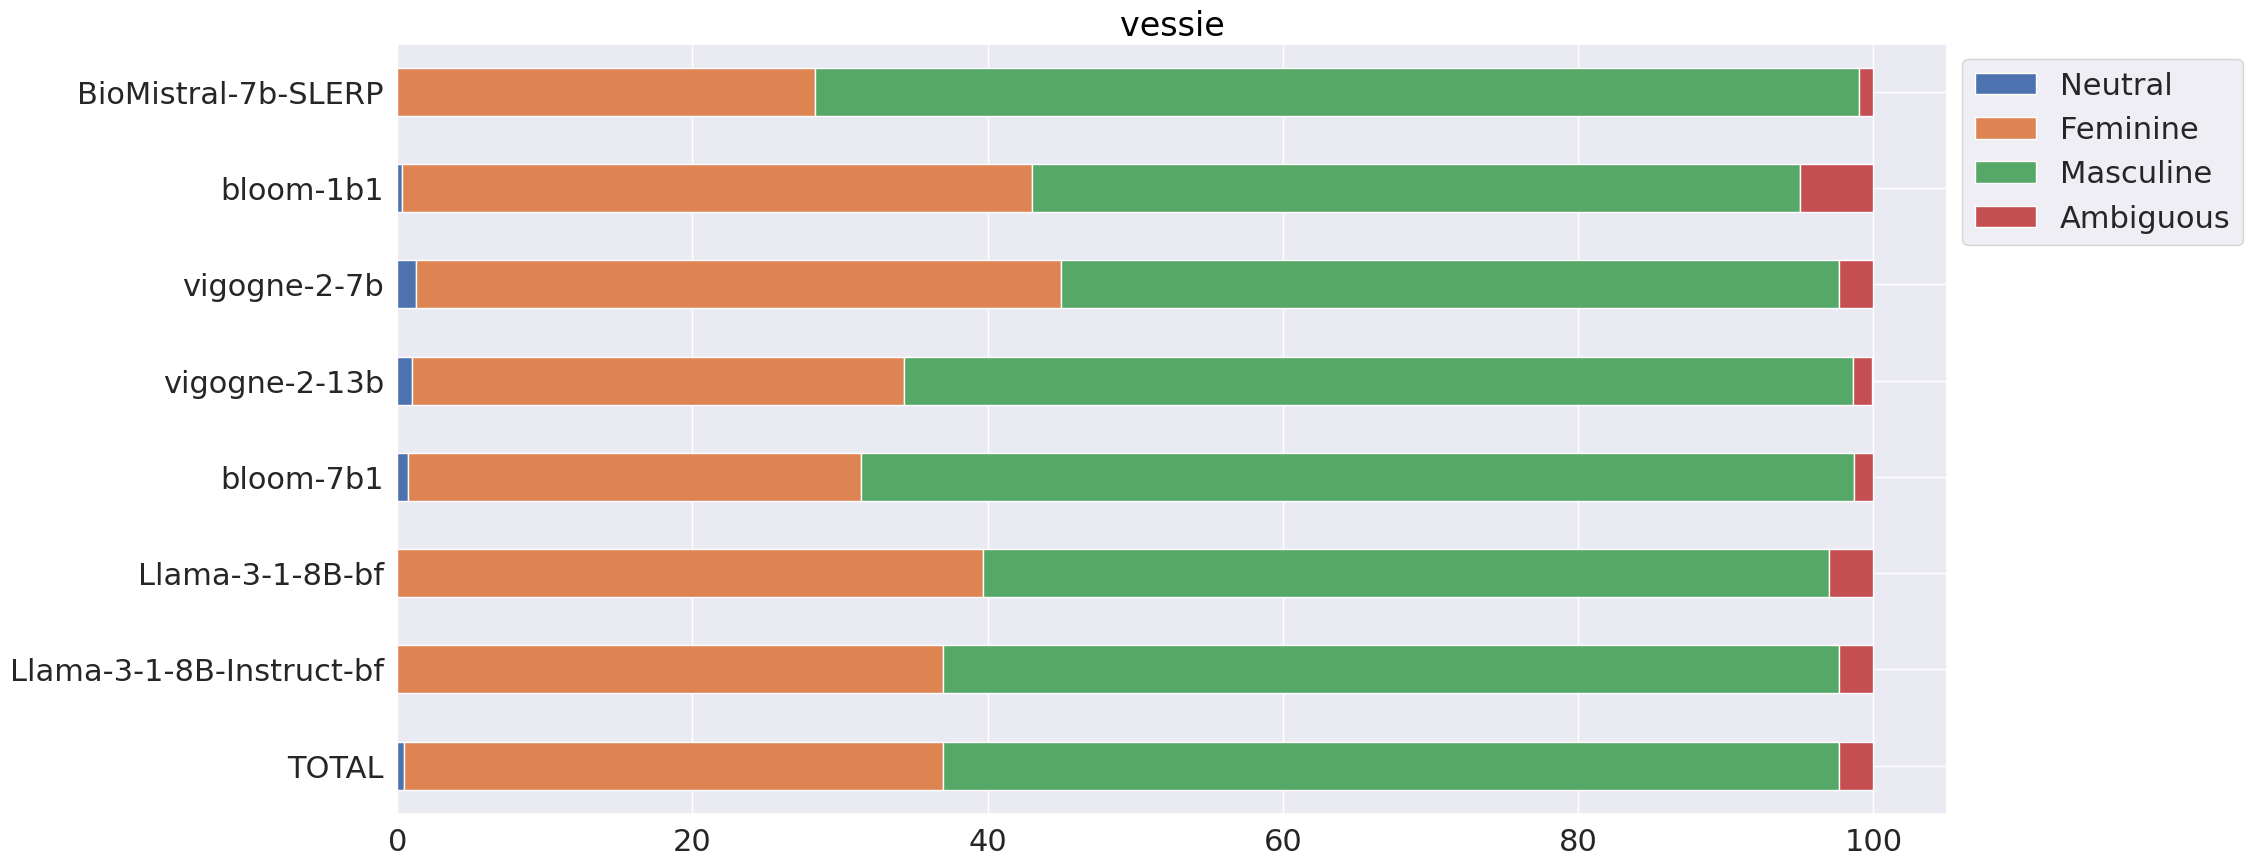

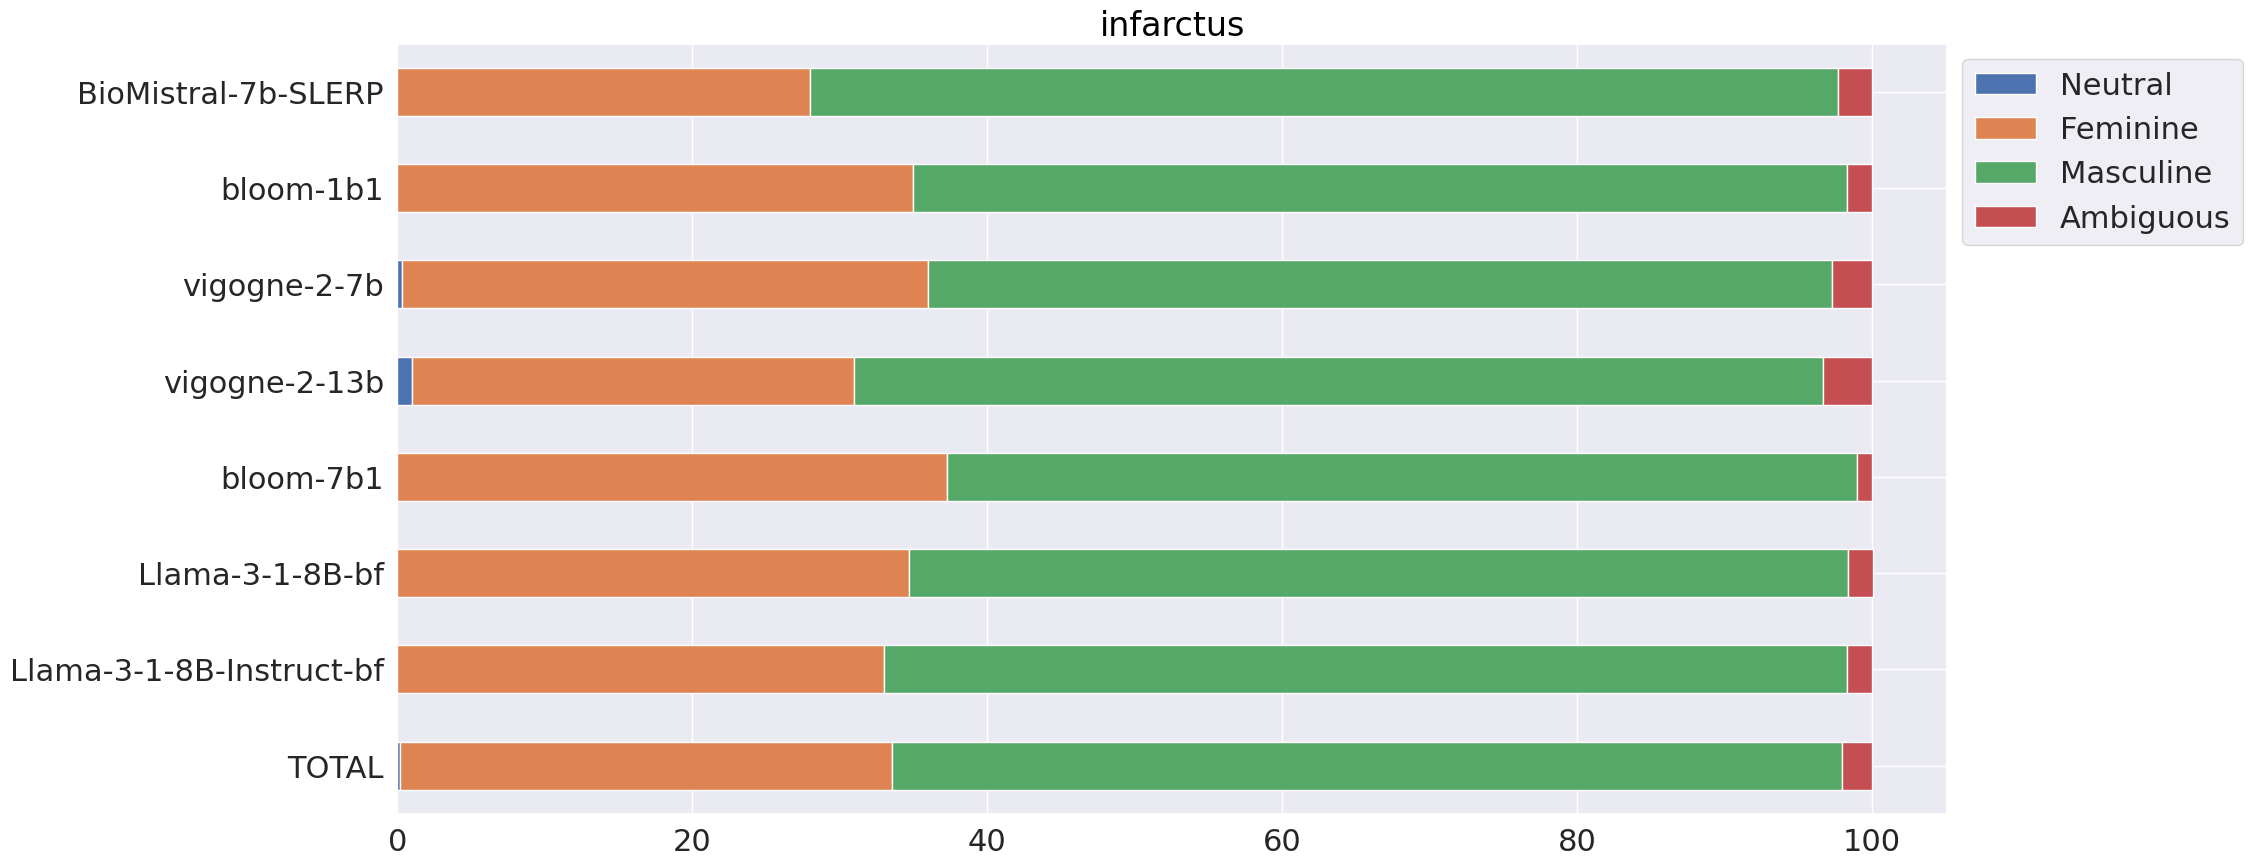

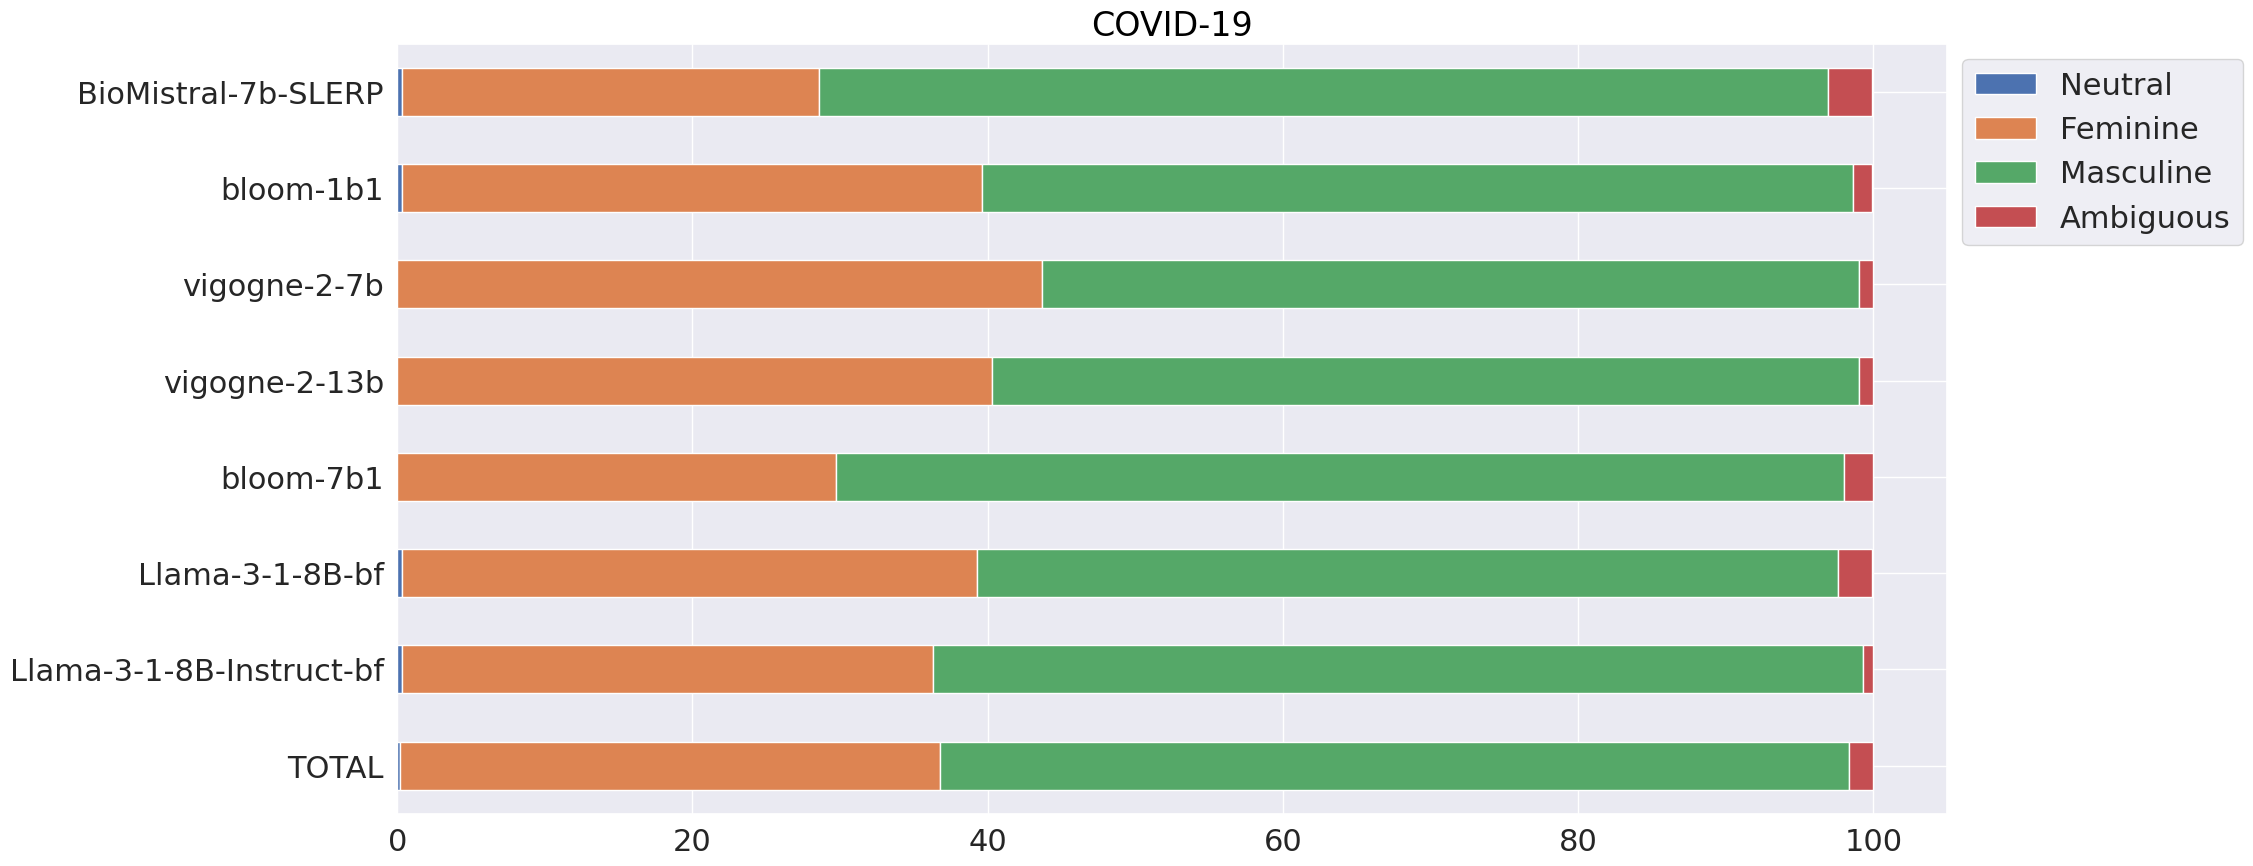

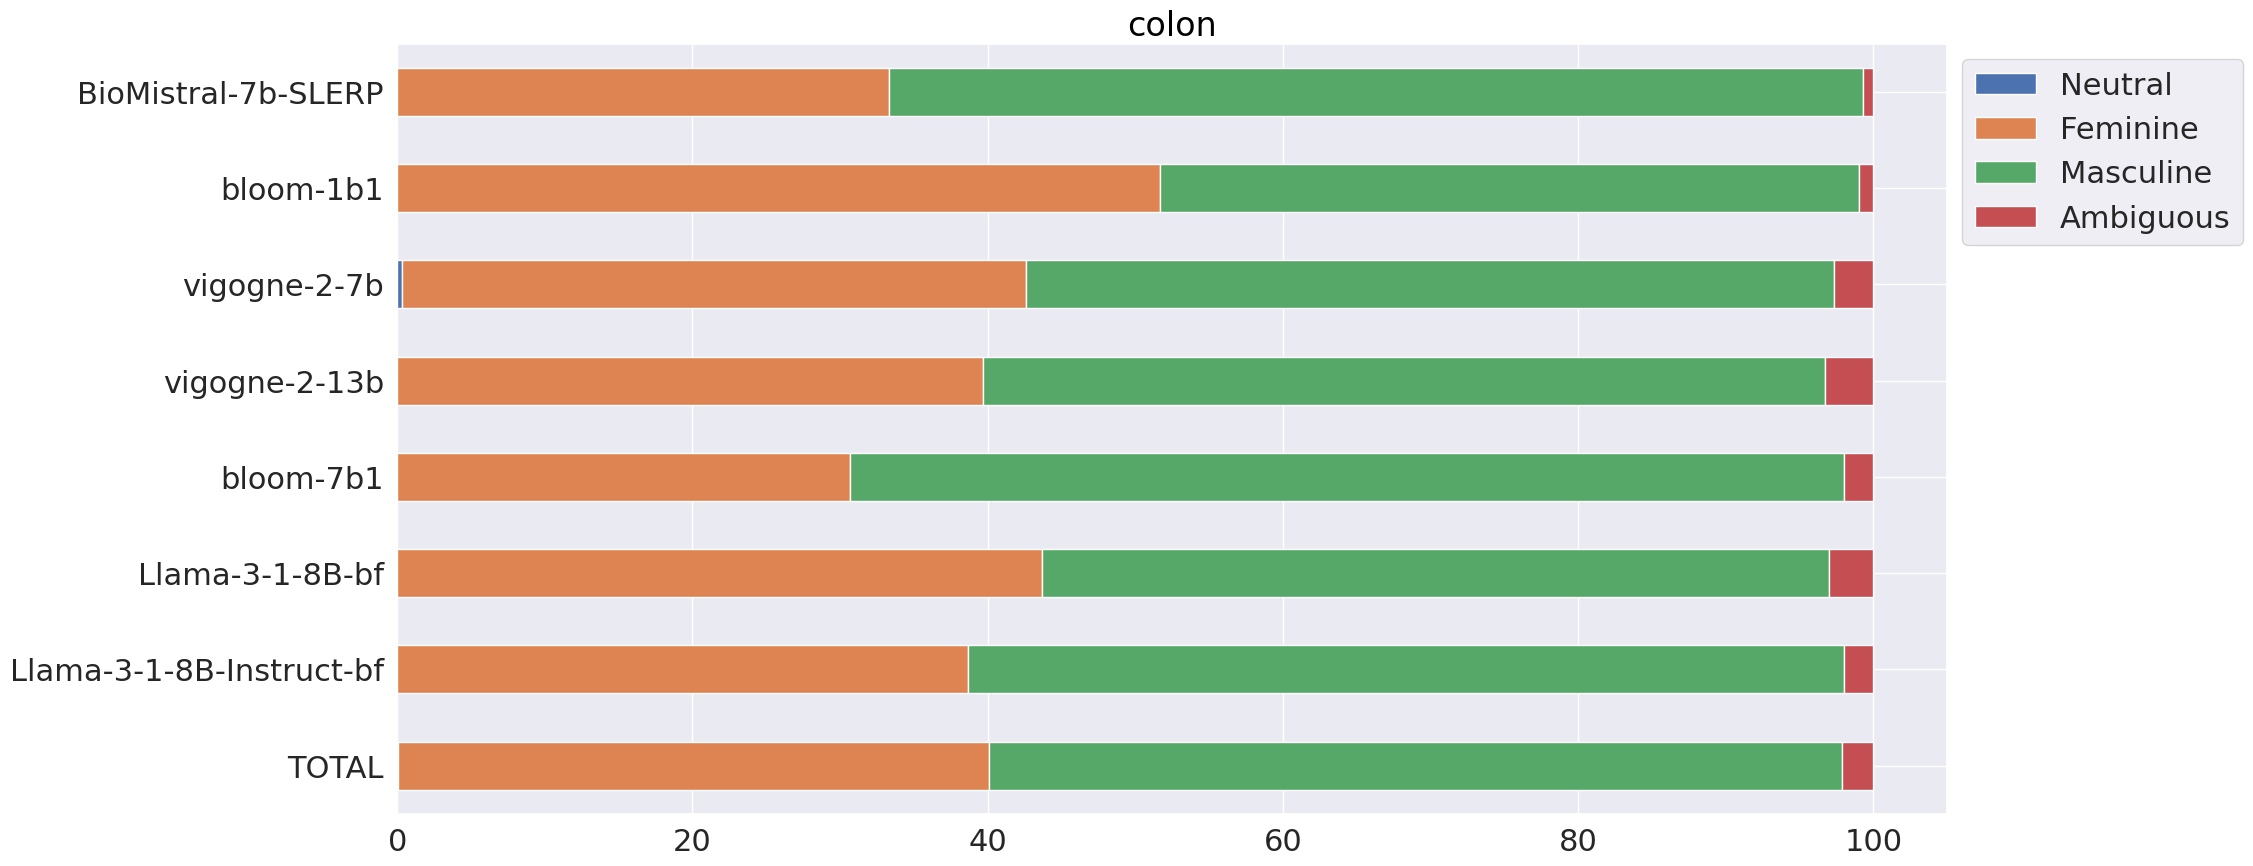

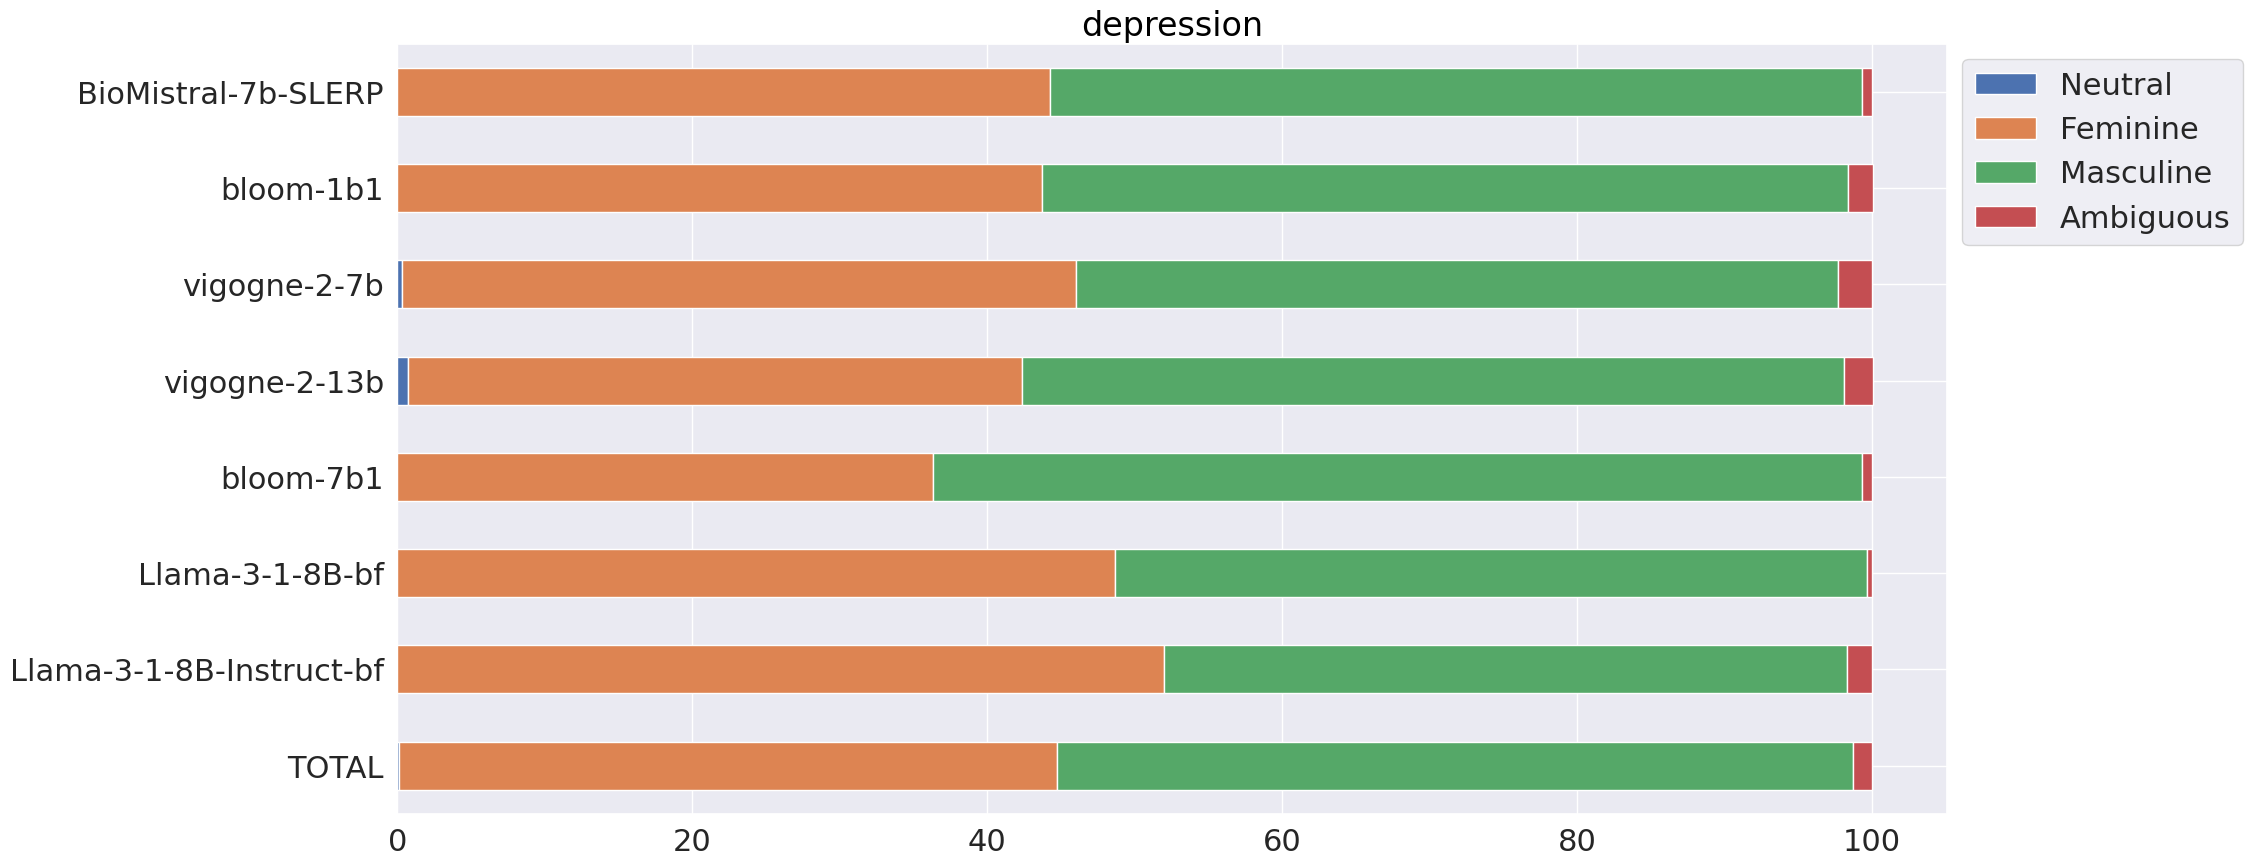

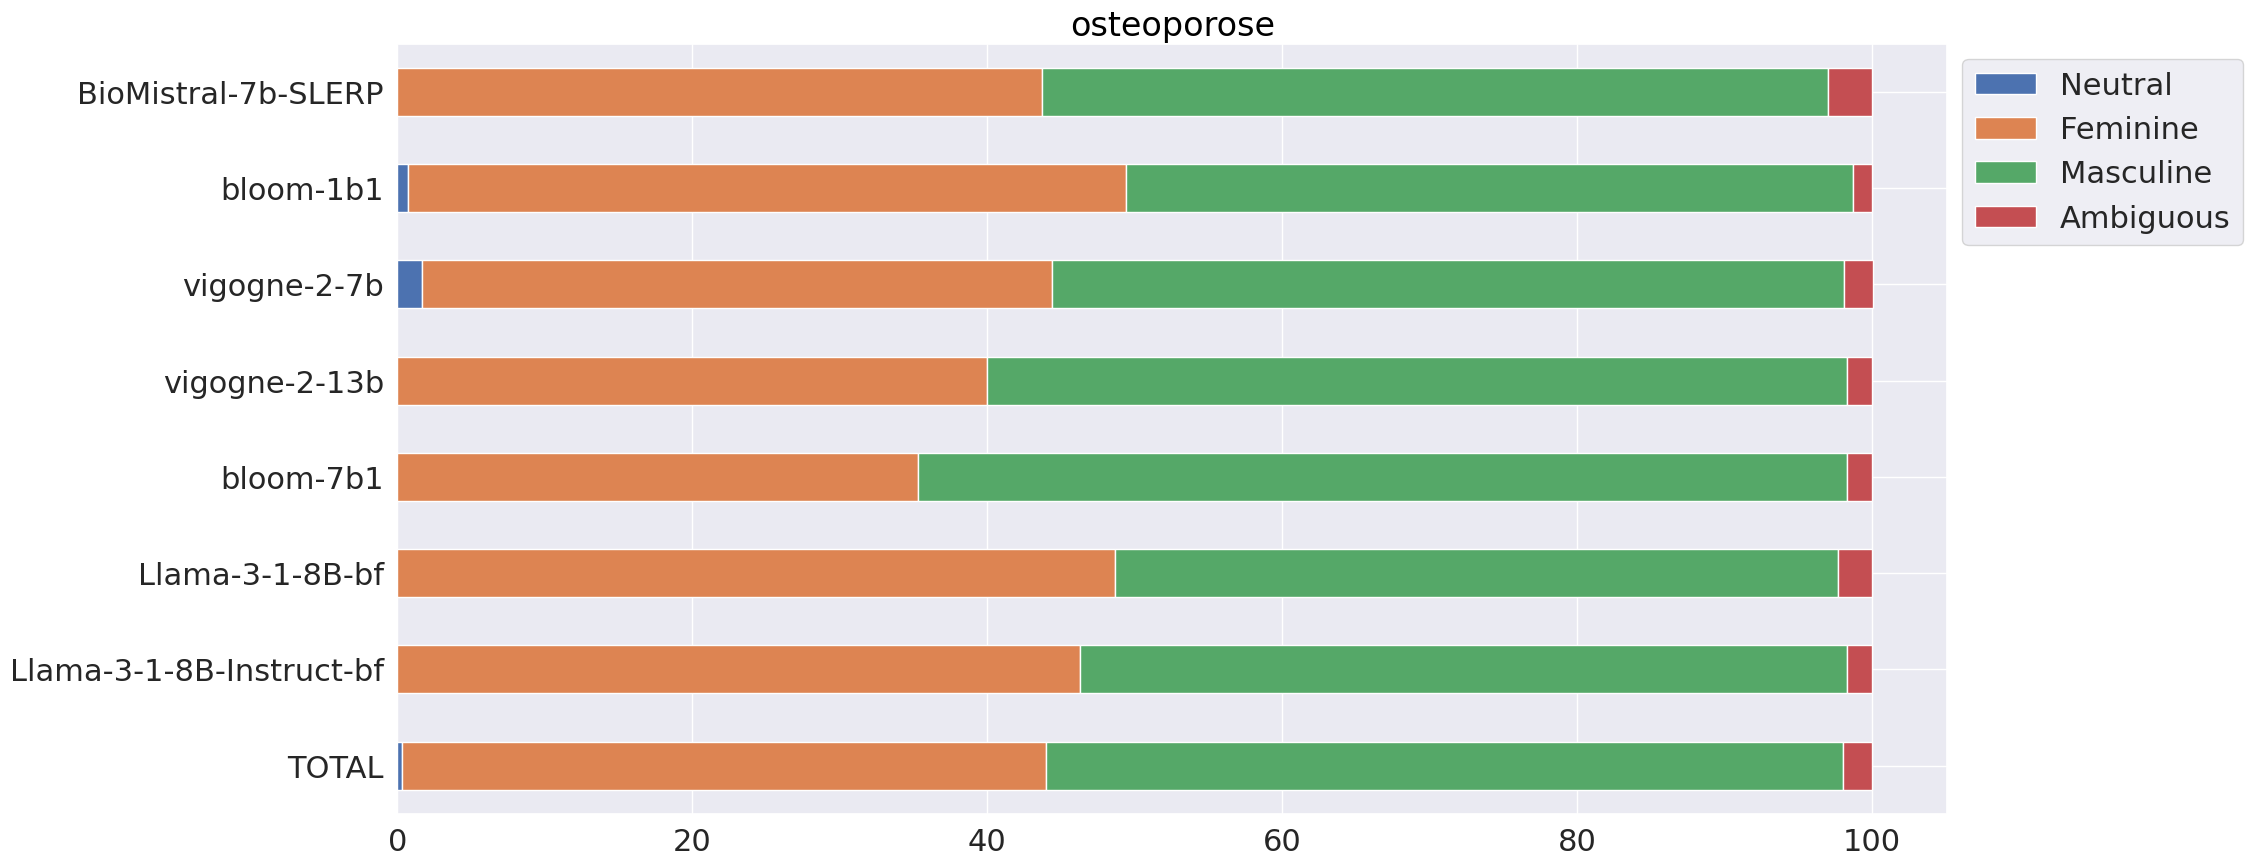

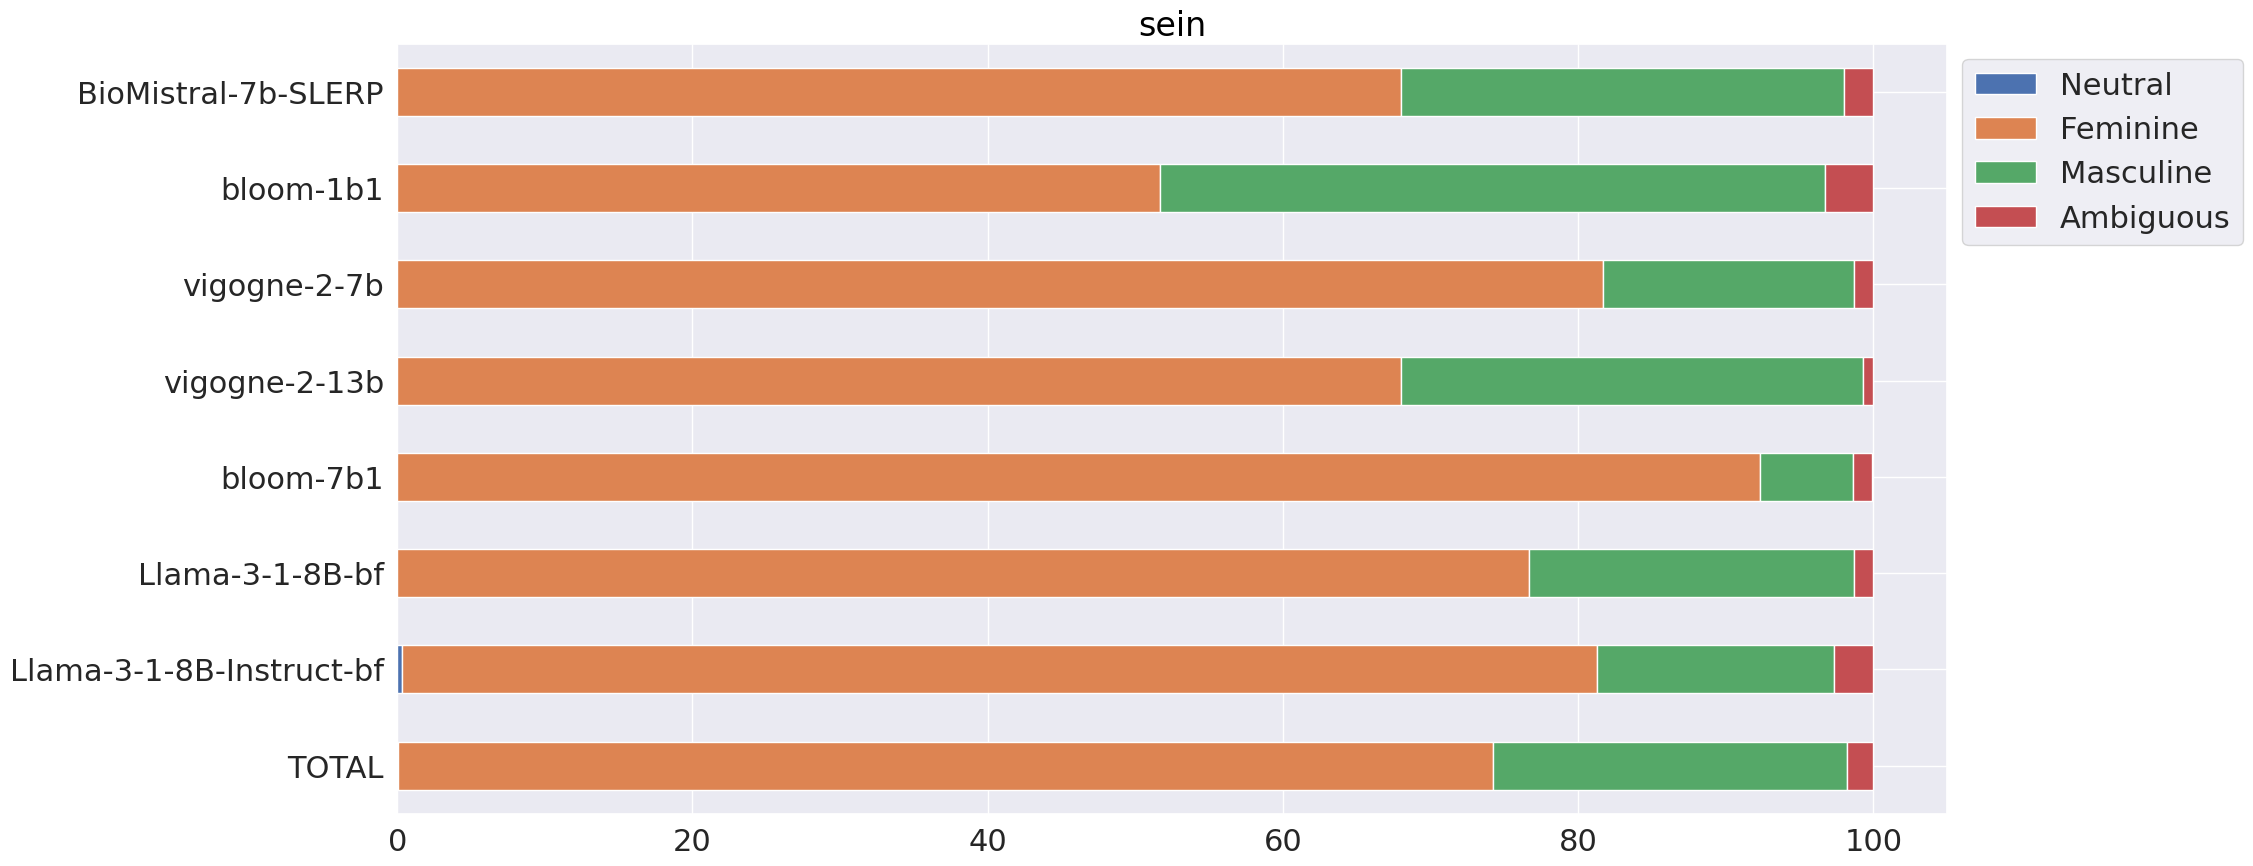

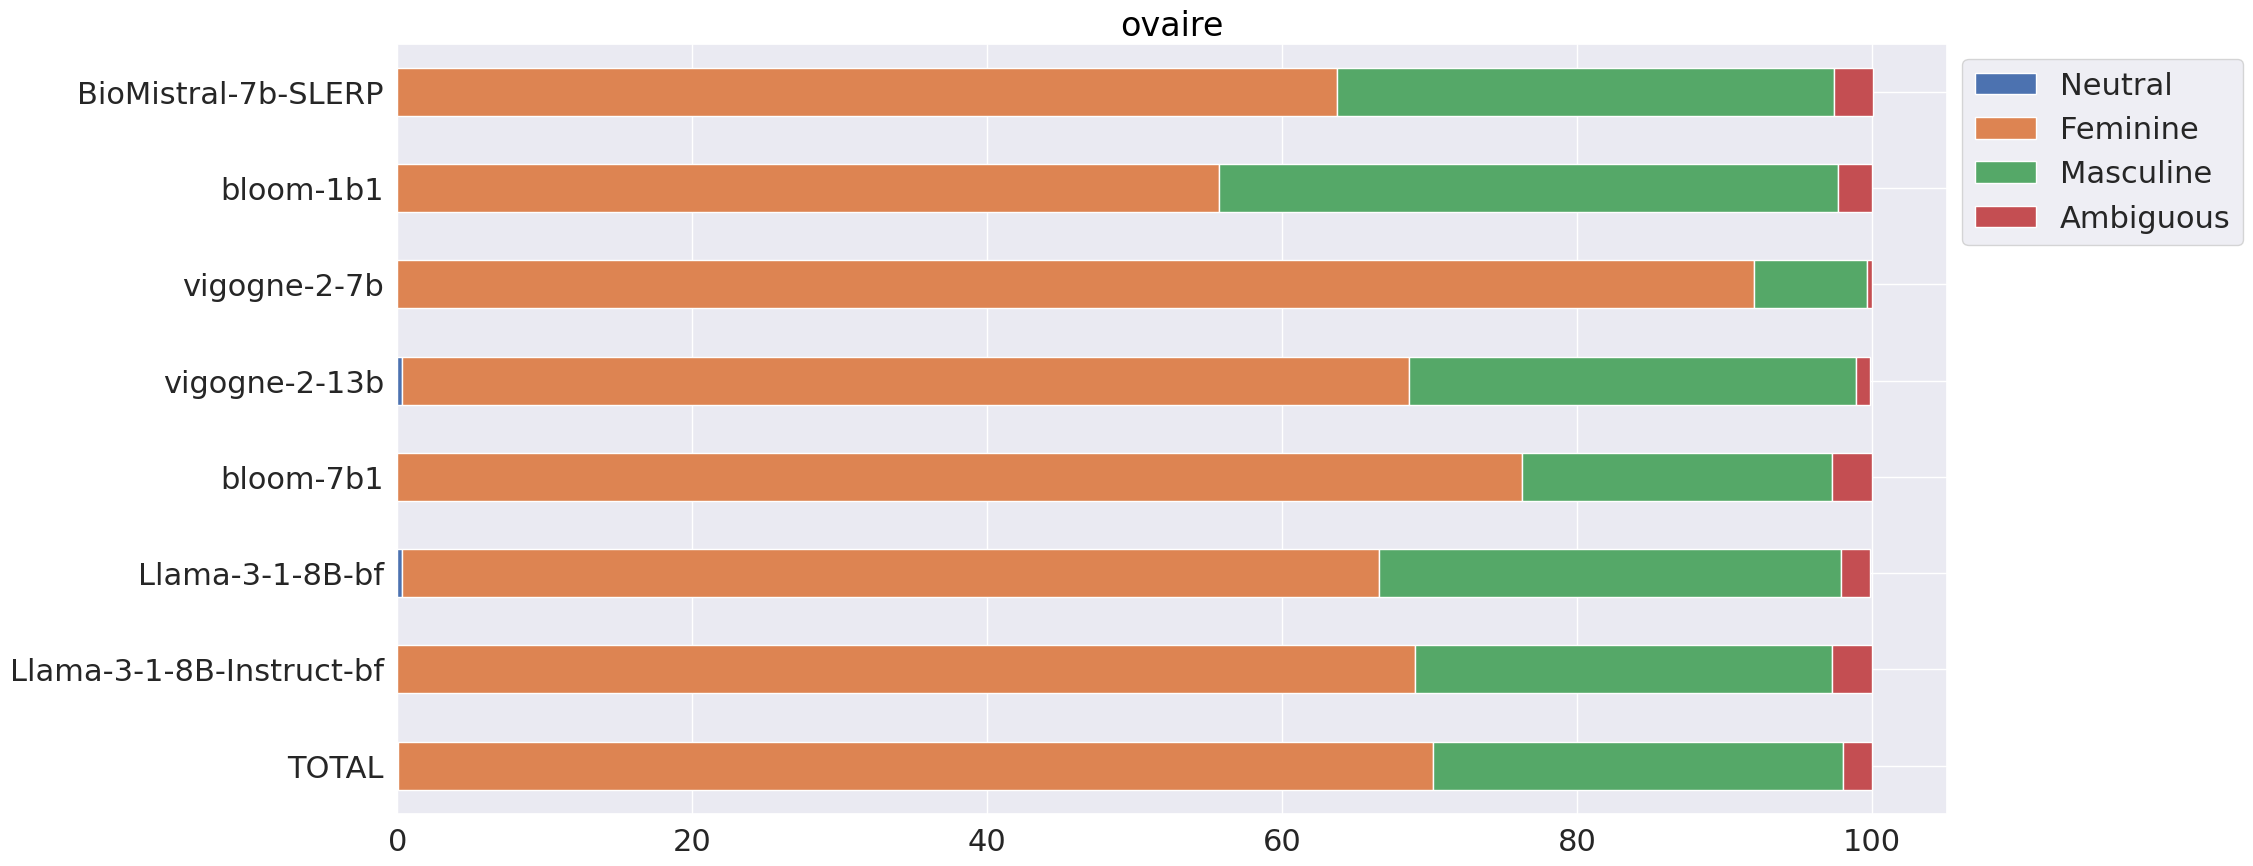

In [32]:
"""Ordre par topic, puis par modèle"""

"""ATTENTION CHANGEMENT DE COULEURS, À CORRIGER #TODO"""

#modeles = ["bloom-560m", "bloom-3b", "bloom-7b", "vigogne-2-7b", "gpt2-fr", "xglm-2.9B"]
for topic in topics:
    table = []
    for model in modeles:
        op = exploration_donnees_per_topic_model(data_genre,label,model,topic)
        op['model'] = model
        table.append(op)

    print("\n",topic)
    print(tabulate(table, headers='keys'))
    
    for d in table:
        for genre in ["Neutral","Feminine", "Masculine","Ambiguous"]:
            if genre not in d:
                d[genre]="0%"
    table_new = [{"Neutral":float(d["Neutral"][:-1]), "Feminine":float(d["Feminine"][:-1]),
                 "Masculine":float(d["Masculine"][:-1]),"Ambiguous":float(d["Ambiguous"][:-1])} for d in table]
    new_dic = {}
    for genre in ["Neutral","Feminine", "Masculine","Ambiguous"]:
        new_dic[genre] = sum([d[genre] for d in table_new])/len(table_new)
    #table_new.append(new_dic)
    table_new.insert(0,new_dic)
    
    """    # ajouter une barre pour le total
    total = {}
    for genre in ["Masc", "Fem", "Neutre", "Ambigu"]:
        n = sum([dic[genre] for dic in table_new])
        total[genre] = n/len(table_new)

    table_new.append(total)"""

    df = pd.DataFrame(table_new, index=["TOTAL"]+modeles)
    ax = df.plot(kind="barh", stacked=True)
    ax.set_title(topic,color='black')
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    #plt.savefig(f"analyse_fig-tables/gender_per_topic+model_{topic}.png",bbox_inches = "tight")
    ax.plot()

## Stylométrie (stats sur les textes)

Quelques statistiques & graphiques sur les données : moyenne de nombre de mots, de caractères, de mots uniques
(fonction adaptée de code trouvé en ligne : https://medium.com/analytics-vidhya/nlp-tutorial-for-text-classification-in-python-8f19cd17b49e )

In [33]:
def stats_donnees(dataset, label, filtre_model=None):
    cat_m="Masculine"
    cat_f="Feminine"
    cat_n="Neutral"
    cat_a = "Ambiguous"
    
    if filtre_model:
        dataset = dataset[dataset["model"]==filtre_model]
    
    #1. WORD-COUNT
    dataset['word_count'] = dataset["generation"].apply(lambda x: len(str(x).split()))
    
    #2. CHARACTER-COUNT
    dataset['char_count'] = dataset['generation'].apply(lambda x: len(str(x)))

    #3. UNIQUE WORD-COUNT
    dataset['unique_word_count'] = dataset['generation'].apply(lambda x: len(set(str(x).split())))
    
    res_word= {"Masc": dataset[dataset[label]==cat_m]['word_count'].mean(), "Fem": dataset[dataset[label]==cat_f]['word_count'].mean(),
          "Neutre":dataset[dataset[label]==cat_n]['word_count'].mean(), "Ambigu":dataset[dataset[label]==cat_a]['word_count'].mean(),
              }
    
    res_char= {"Masc": dataset[dataset[label]==cat_m]['char_count'].mean(), "Fem": dataset[dataset[label]==cat_f]['char_count'].mean(),
          "Neutre":dataset[dataset[label]==cat_n]['char_count'].mean(), "Ambigu":dataset[dataset[label]==cat_a]['char_count'].mean()}

    res_uniqueword= {"Masc": dataset[dataset[label]==cat_m]['unique_word_count'].mean(), "Fem": dataset[dataset[label]==cat_f]['unique_word_count'].mean(),
          "Neutre":dataset[dataset[label]==cat_n]['unique_word_count'].mean(), "Ambigu":dataset[dataset[label]==cat_a]['unique_word_count'].mean()}

    
    return res_char, res_word, res_uniqueword


table = []
print("Char")
for model in modeles:
    op = stats_donnees(data_genre,label,model)[0]
    op = {k: v for k, v in op.items() if pd.Series(v).notna().all()}
    op['total'] = sum(op.values())/len(op)
    op['model'] = model
    table.append(op)
print(tabulate(table, headers='keys'))
    
table = []
print("\nWord")
for model in modeles:
    op = stats_donnees(data_genre,label,model)[1]
    op = {k: v for k, v in op.items() if pd.Series(v).notna().all()}
    op['total'] = sum(op.values())/len(op)
    op['model'] = model
    table.append(op)
print(tabulate(table, headers='keys'))
    
table = []
print("\nUnique word")
for model in modeles:
    op = stats_donnees(data_genre,label,model)[2]
    op = {k: v for k, v in op.items() if pd.Series(v).notna().all()}
    op['total'] = sum(op.values())/len(op)
    op['model'] = model
    table.append(op)

print(tabulate(table, headers='keys'))

"""for model in modeles:
    print("\n ---", model)
    stats_donnees(data_genre, label, model)
    print("*"*60)"""

Char
   Masc      Fem    Neutre    Ambigu    total  model
-------  -------  --------  --------  -------  ------------------------
3565.19  3694.5    1371      3590.41  3055.28  Llama-3-1-8B-Instruct-bf
3912.4   3886.58   3310.67   3851.34  3740.25  Llama-3-1-8B-bf
5409.61  5331.22   5199.8    5349.17  5322.45  bloom-7b1
3885.27  3831.39   3856.6    3900.19  3868.36  vigogne-2-13b
3510.87  3628.4    2826.75   3427.62  3348.41  vigogne-2-7b
5406.3   5343.91   5196.82   5333.02  5320.01  bloom-1b1
3874.1   3836.73   4030      3921.6   3915.61  BioMistral-7b-SLERP

Word
   Masc      Fem    Neutre    Ambigu    total  model
-------  -------  --------  --------  -------  ------------------------
532.525  555.262   221       533.724  460.628  Llama-3-1-8B-Instruct-bf
588.949  588.7     500.333   579.743  564.431  Llama-3-1-8B-bf
811.089  805.949   801.2     805.829  806.017  bloom-7b1
573.549  568.902   550.933   575.672  567.264  vigogne-2-13b
512.556  535.285   384.25    502.672  483.691  vi

'for model in modeles:\n    print("\n ---", model)\n    stats_donnees(data_genre, label, model)\n    print("*"*60)'

In [248]:
"""PRÉPARER FICHIERS TXT POUR TXM"""
for genre in ["Masc", "Fem", "Neutre", "Ambigu"]:
    df_genre = data_genre[data_genre["Identified_gender"]==genre]
    with open(f"txm/global_{genre}.txt", "w") as f:
        f.write(str(list(df_genre["output"])))